# COGS 108 - U.S Healthcare Quality & Life Expectancy

# Overview

In this project, we will explore the relationship between U.S healthcare quality - measured by national health expenditure & health indicators (vaccination rates, youth mortality rates, etc.) - and U.S life expectancy in 1980-2016. To begin, we will analyze the time trends of national spending, health measures, and life expectancy to build three Linear Regression models that quantify the effect of these indicators on life expectancy. For our results, we will see that healthcare spending is the most significant predictor into predicting life expectancy.

# Names

- Frida Mancilla
- Gabriella Bulacan
- Tatsuya Aizawa
- Murad Ali Gondal
- Sarat Sreepathy

<a id='research_question'></a>
# Research Question

Given that the efficiency of a country’s healthcare system can be measured by both economic indicators (GDP Expenditure) and health indicators (childhood mortality, vaccination coverage, insurance rate), how much does the quality of healthcare in the U.S contribute to the change in life expectancy from 1980 to 2016?

<a id='background'></a>

## Background & Prior Work

The U.S. healthcare system does not provide universal health care, but rather through a combination of private and public health insurance and other federal and state programs. Almost 15% of adults through the ages of 18-64 are not covered by insurance and this number is predicted to increase over the next coming years. More than half of the hospitals in the US are not-for-profit and generate their income by working and contracting with multiple insurances. Health insurers maintain their costs through charging customers out-of-pocket bills, and also by restricting the number of providers covered through their plans [5]. If a person with no insurance were to go to an uncovered provider, they would have to pay right out of pocket, which is very expensive. However, the US does still provide some of the best care in the world. Prior to the recession caused by COVID-19, millions of Americans were already unable to afford medical care/costs, while class-based and racial inequities in care still exist [3]. 
From a study down by the Organization for Economic Co-operation and Development (OECD), the U.S. spends the most on healthcare when compared to other high-income countries (i.e. Australia, Canada, UK, New Zealand, etc.), and yet it still has the lowest life expectancy rates [4]. In 2018, the U.S “ranked 29th in healthcare access and quality.”[1] To explain the efficacy of the U.S healthcare system, analysts have obtained information on government spending in the healthcare sector, GDP, Total Factor of Productivity (TFP), and other economic indicators [2]. In order to complete this task, our team will take on a similar approach to evaluate if a higher efficacy leads to a higher life expectancy in the U.S throughout the years. Additionally, we want to evaluate whether the estimates on life expectancy (given the U.S healthcare large costs) differ from actual data.


References:
1. https://en.wikipedia.org/wiki/Health_care_in_the_United_States#:~:text=Healthcare%20coverage%20is%20provided%20through,unlike%20most%20other%20developed%20countries.&text=In%20a%202018%20study%2C%20the,in%20healthcare%20access%20and%20quality


2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6014796/

3. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7331107/#bibr9-0020731420937631 

4. https://www.commonwealthfund.org/publications/issue-briefs/2020/jan/us-health-care-global-perspective-2019 

5. https://grattan.edu.au/news/more-expensive-but-less-effective-the-us-healthcare-system-explained/ 

# Hypothesis


We hypothesize that as U.S healthcare quality (measured by economic and health indicators) increases, life expectancy also increases.

# Dataset(s)

1.
- Dataset Name: Life Expectancy at Birth (World Bank data) (1960-2016)
- Link to the dataset: https://ourworldindata.org/life-expectancy
- Number of observations: 13,748
- Description: This dataset contains number of years of life expectancy at birth from multiple countries around the world (includes U.S.)

2.
- Dataset Name: U.S National Health Expenditure Summary (1960-2016)
- Link to the dataset: https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NationalHealthAccountsHistorical
- Number of observations: 34
- Description: Contains info on healthcare expenditure/consumption, GDP per capita, U.S population, etc.

3.
- Dataset Name: Childhood Mortality (1950-2017)
- Link to the dataset:
https://ourworldindata.org/child-mortality-in-the-past 
- Number of observations: 8,345
- Description: This dataset contains the mortality rates of children that died before reaching 15.

4.
- Dataset Name: Annual Number of Deaths (1950-2019) 
- Link to the dataset: https://ourworldindata.org/grapher/annual-number-of-deaths-by-world-region
- Number of observations: 17,220
-  Description: Contains annual number of deaths in the entire world (includes U.S)

5.
- Dataset Name: Vaccination Coverage by Income (1980-2017)
- Link to the dataset: https://ourworldindata.org/grapher/vaccination-coverage-by-income-in
- Number of observations: 47,407
- Description: Contains the percentage coverage of one-year olds that were vaccinated against diphtheria, pertussis, and tetanus.

6.
- Dataset name: Insurance Rate (1963-2015)
- Link to the dataset:
https://ourworldindata.org/grapher/percentage-of-persons-without-health-insurance-coverage-us 
- Number of observations: 39
- Description: Contains percentage of persons in the U.S without health insurance.

Since we have multiple datasets, we will join the datasets by year. The earliest year throughout all datasets is 1980 and latest is 2016. This will be our year window of a total of 36 years.

# Setup

In [1]:
import pandas as pd
import os

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Data Cleaning

Describe your data cleaning steps here.

### 1. National Health Expenditure Summary (NHE)

In [3]:
nhe = pd.read_excel(os.path.join('data', 'NHE19_Summary.xlsx'), engine='openpyxl')
nhe.head()

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Calendar Years 1960-2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95
0,Expenditure Amount,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,National Health Expenditures (Amount in Billions),27.1,29.1,31.8,34.6,38.2,41.6,45.8,51.2,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Health Consumption Expenditures,24.6,26.2,28.3,30.8,33.9,36.9,40.8,46.0,52.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Personal Health Care,23.1,24.6,26.5,29.0,31.8,34.4,38.0,43.0,48.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Government Administration and Net...,1.1,1.2,1.3,1.3,1.5,1.8,2.0,2.1,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Transpose National Healthcare Expenditure df so that year is a variable.
nhe = nhe.transpose()

nhe.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Calendar Years 1960-2019",Expenditure Amount,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,1960,27.1,24.6,23.1,1.1,0.4,2.6,186.2,542.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,1961,29.1,26.2,24.6,1.2,0.4,2.9,189.2,562.2,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,1962,31.8,28.3,26.5,1.3,0.5,3.5,192,603.9,9.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,1963,34.6,30.8,29,1.3,0.5,3.8,194.8,637.5,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Column names are stored in first row of the df, we need to change this accordingly.
nhe.columns = nhe.iloc[0]
nhe = nhe.rename(columns={'Expenditure Amount': 'Year'})
nhe = nhe.iloc[1:]
nhe = nhe.rename_axis(None, axis=1) # (Drop index header.)

nhe.head()

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,1960,27.1,24.6,23.1,1.1,0.4,2.6,186.2,542.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,1961,29.1,26.2,24.6,1.2,0.4,2.9,189.2,562.2,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,1962,31.8,28.3,26.5,1.3,0.5,3.5,192,603.9,9.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,1963,34.6,30.8,29,1.3,0.5,3.8,194.8,637.5,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 5,1964,38.2,33.9,31.8,1.5,0.6,4.3,197.4,684.5,10.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Last 4 columns we orginally rows that contained info on the dataset (footnotes), we can remove these as well.
nhe = nhe.iloc[:,:-4]
nhe = nhe.reset_index(drop=True)
nhe = nhe.dropna(axis=1, how='all')
nhe.head()

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures (Per Capita Amount),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent)
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186.2,542.4,NaN,...,3.9,1.4,9.5,146,132,124,6,2,14,5
1,1961,29.1,26.2,24.6,1.2,0.4,2.9,189.2,562.2,7.1,...,4,1.4,9.9,154,138,130,6,2,15,5.2
2,1962,31.8,28.3,26.5,1.3,0.5,3.5,192,603.9,9.3,...,4,1.4,11,165,147,138,7,2,18,5.3
3,1963,34.6,30.8,29,1.3,0.5,3.8,194.8,637.5,8.8,...,3.8,1.5,10.9,177,158,149,7,3,19,5.4
4,1964,38.2,33.9,31.8,1.5,0.6,4.3,197.4,684.5,10.7,...,3.9,1.5,11.4,194,172,161,8,3,22,5.6


### 2. Life Expectancy data (World Bank)

In [7]:
life_expectancy = pd.read_csv(os.path.join('data', 'life-expectancy-at-birth-total-years.csv'))
life_expectancy.head()

,Entity,Code,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,1960,32.292
1,Afghanistan,AFG,1961,32.742
2,Afghanistan,AFG,1962,33.185
3,Afghanistan,AFG,1963,33.624
4,Afghanistan,AFG,1964,34.060


In [8]:
# We only need to grab colummns containing info on the US and >= 1980
life_expectancy = life_expectancy[life_expectancy['Entity'] == 'United States']
life_expectancy = life_expectancy.drop(columns=['Entity', 'Code'])
life_expectancy = life_expectancy[life_expectancy['Year'] >= 1980].reset_index(drop=True)
life_expectancy = life_expectancy.reset_index(drop=True)

life_expectancy.head()

,Year,"Life expectancy at birth, total (years)"
0,1980,73.609756
1,1981,74.009756
2,1982,74.360976
3,1983,74.463415
4,1984,74.563415


In [9]:
# Starting to merge them by year into a single dataframe, datum.

datum = pd.merge(nhe, life_expectancy, on='Year')
datum.head()

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,Government Public Health Activities,Investment,National Health Expenditures (Per Capita Amount),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),"Life expectancy at birth, total (years)"
0,1980,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,...,2.5,8.1,1099,1010,930,52,28,89,8.9,73.609756
1,1981,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,...,2.6,8,1262,1161,1068,60,32,101,9.2,74.009756
2,1982,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,...,2.6,8.1,1408,1295,1189,69,37,114,9.9,74.360976
3,1983,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,...,2.5,8,1538,1414,1298,77,39,123,10,74.463415
4,1984,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,...,2.4,7.7,1679,1550,1412,97,41,129,10,74.563415


In [10]:
datum.shape

(37, 31)

### 3. Childhood Mortality Rates

In [11]:
child_mort = pd.read_csv(os.path.join('data', 'Childhood_Mortality_Over_Years.csv'))
child_mort = child_mort[child_mort['Entity'] == 'United States'].reset_index(drop=True) # filter by U.S as well
child_mort = child_mort.drop(columns=['Entity', 'Code'])
child_mort = child_mort[child_mort['Year'] >= 1980].reset_index(drop=True)

child_mort.head()

,Year,Youth mortality rate (UN IGME (2018))
0,1980,1.795500
1,1981,1.725824
2,1982,1.666108
3,1983,1.606382
4,1984,1.566490


In [12]:
datum = pd.merge(datum, child_mort, on='Year')

datum.head() # earliest year should still be 1980

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,Investment,National Health Expenditures (Per Capita Amount),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),"Life expectancy at birth, total (years)",Youth mortality rate (UN IGME (2018))
0,1980,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,...,8.1,1099,1010,930,52,28,89,8.9,73.609756,1.795500
1,1981,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,...,8,1262,1161,1068,60,32,101,9.2,74.009756,1.725824
2,1982,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,...,8.1,1408,1295,1189,69,37,114,9.9,74.360976,1.666108
3,1983,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,...,8,1538,1414,1298,77,39,123,10,74.463415,1.606382
4,1984,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,...,7.7,1679,1550,1412,97,41,129,10,74.563415,1.566490


In [13]:
datum.shape[0] == 37 # checking year frame is preserved...

True

### 4. Annual Number of Deaths

In [14]:
annual_deaths = pd.read_csv(os.path.join('data', 'annual-number-of-deaths-by-world-region.csv'))
annual_deaths.head()

,Entity,Code,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Deaths (thousands)"
0,Afghanistan,AFG,1950,298139.0
1,Afghanistan,AFG,1951,297342.0
2,Afghanistan,AFG,1952,295841.0
3,Afghanistan,AFG,1953,294524.0
4,Afghanistan,AFG,1954,293392.0


In [15]:
annual_deaths = annual_deaths[annual_deaths['Entity'] == 'United States']
annual_deaths = annual_deaths.drop(columns=['Entity', 'Code'])
annual_deaths = annual_deaths[annual_deaths['Year'] >= 1980].reset_index(drop=True)
annual_deaths = annual_deaths.reset_index(drop=True)

annual_deaths.head()

,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Deaths (thousands)"
0,1980,2017882.0
1,1981,2037675.0
2,1982,2061284.0
3,1983,2087053.0
4,1984,2113891.0


In [16]:
#merge annual deaths data on year
datum = pd.merge(datum, annual_deaths, on='Year')

datum.head() # earliest year should still be 1980

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,National Health Expenditures (Per Capita Amount),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),"Life expectancy at birth, total (years)",Youth mortality rate (UN IGME (2018)),"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Deaths (thousands)"
0,1980,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,...,1099,1010,930,52,28,89,8.9,73.609756,1.795500,2017882.0
1,1981,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,...,1262,1161,1068,60,32,101,9.2,74.009756,1.725824,2037675.0
2,1982,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,...,1408,1295,1189,69,37,114,9.9,74.360976,1.666108,2061284.0
3,1983,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,...,1538,1414,1298,77,39,123,10,74.463415,1.606382,2087053.0
4,1984,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,...,1679,1550,1412,97,41,129,10,74.563415,1.566490,2113891.0


In [17]:
datum.shape[0] == 37 # checking year frame is preserved...

True

### 5. Vaccination Rate Over Years

In [18]:
vaccination_rate = pd.read_csv(os.path.join('data', 'vaccination-coverage-by-income-in.csv'))
vaccination_rate.head()

,Entity,Code,Year,DTP3 (% of one-year-olds immunized),Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1980,4.0,NaN,13357000.0,NaN
2,Afghanistan,AFG,1981,3.0,NaN,13172000.0,NaN
3,Afghanistan,AFG,1982,5.0,NaN,12883000.0,NaN
4,Afghanistan,AFG,1983,5.0,NaN,12538000.0,NaN


In [19]:
# We only need the colummns containing info on the US and >= 1980
vaccination_rate = vaccination_rate[vaccination_rate['Entity'] == 'United States']
vaccination_rate = vaccination_rate.drop(columns=['Entity', 'Code'])
vaccination_rate = vaccination_rate[vaccination_rate['Year'] >= 1980].reset_index(drop=True)
vaccination_rate = vaccination_rate.reset_index(drop=True)

vaccination_rate.head()

,Year,DTP3 (% of one-year-olds immunized),Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Total population (Gapminder, HYDE & UN)",Continent
0,1980,96.0,29154.891,229476000.0,NaN
1,1981,96.0,29631.477,231636000.0,NaN
2,1982,96.0,28651.811,233822000.0,NaN
3,1983,97.0,29674.672,236030000.0,NaN
4,1984,97.0,31669.826,238256992.0,NaN


In [20]:
#merge vaccination data on year
datum = pd.merge(datum, vaccination_rate, on='Year')

datum.head() # earliest year should still be 1980

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),"Life expectancy at birth, total (years)",Youth mortality rate (UN IGME (2018)),"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Deaths (thousands)",DTP3 (% of one-year-olds immunized),Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Total population (Gapminder, HYDE & UN)",Continent
0,1980,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,...,28,89,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,229476000.0,NaN
1,1981,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,...,32,101,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,231636000.0,NaN
2,1982,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,...,37,114,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,233822000.0,NaN
3,1983,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,...,39,123,10,74.463415,1.606382,2087053.0,97.0,29674.672,236030000.0,NaN
4,1984,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,...,41,129,10,74.563415,1.566490,2113891.0,97.0,31669.826,238256992.0,NaN


In [21]:
datum.shape[0] == 37 # checking year frame is preserved...

True

### 6. Insurance Rate Over the Years

In [22]:
insurance_rate = pd.read_csv(os.path.join('data', 'Insurance_Rate_Over_Years.csv'))
insurance_rate.head()

,Entity,Code,Year,Percentage of persons without health insurance (%)
0,United States,USA,1963,24.3
1,United States,USA,1968,14.5
2,United States,USA,1970,14.6
3,United States,USA,1972,13.2
4,United States,USA,1974,11.4


In [23]:
insurance_rate = insurance_rate[insurance_rate['Entity'] == 'United States']
insurance_rate = insurance_rate.drop(columns=['Entity', 'Code'])
insurance_rate = insurance_rate[insurance_rate['Year'] >= 1980].reset_index(drop=True)
insurance_rate = insurance_rate.reset_index(drop=True)

insurance_rate.head()

,Year,Percentage of persons without health insurance (%)
0,1980,11.4
1,1982,12.5
2,1983,13.1
3,1984,12.9
4,1986,13.3


In [24]:
datum = datum.set_index('Year')
insurance_rate = insurance_rate.set_index('Year')
datum['Percentage of persons without health insurance (%)'] = insurance_rate['Percentage of persons without health insurance (%)']
datum.head()

,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),Health Consumption Expenditures,...,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),"Life expectancy at birth, total (years)",Youth mortality rate (UN IGME (2018)),"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Deaths (thousands)",DTP3 (% of one-year-olds immunized),Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Total population (Gapminder, HYDE & UN)",Continent,Percentage of persons without health insurance (%)
Year,,,,,,,,,,,,,,,,,,,,,
1980.0,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,15.1,...,89,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,229476000.0,NaN,11.4
1981.0,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,16.1,...,101,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,231636000.0,NaN,NaN
1982.0,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,12.6,...,114,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,233822000.0,NaN,12.5
1983.0,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,10.3,...,123,10,74.463415,1.606382,2087053.0,97.0,29674.672,236030000.0,NaN,13.1
1984.0,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,10.6,...,129,10,74.563415,1.566490,2113891.0,97.0,31669.826,238256992.0,NaN,12.9


In [25]:
datum = datum.reset_index()
datum.head()

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),"Life expectancy at birth, total (years)",Youth mortality rate (UN IGME (2018)),"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Deaths (thousands)",DTP3 (% of one-year-olds immunized),Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Total population (Gapminder, HYDE & UN)",Continent,Percentage of persons without health insurance (%)
0,1980.0,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,...,89,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,229476000.0,NaN,11.4
1,1981.0,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,...,101,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,231636000.0,NaN,NaN
2,1982.0,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,...,114,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,233822000.0,NaN,12.5
3,1983.0,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,...,123,10,74.463415,1.606382,2087053.0,97.0,29674.672,236030000.0,NaN,13.1
4,1984.0,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,...,129,10,74.563415,1.566490,2113891.0,97.0,31669.826,238256992.0,NaN,12.9


In [26]:
datum = datum.drop(columns = ['Continent'])
datum.head()

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),"Life expectancy at birth, total (years)",Youth mortality rate (UN IGME (2018)),"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Deaths (thousands)",DTP3 (% of one-year-olds immunized),Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Total population (Gapminder, HYDE & UN)",Percentage of persons without health insurance (%)
0,1980.0,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,...,28,89,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,229476000.0,11.4
1,1981.0,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,...,32,101,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,231636000.0,NaN
2,1982.0,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,...,37,114,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,233822000.0,12.5
3,1983.0,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,...,39,123,10,74.463415,1.606382,2087053.0,97.0,29674.672,236030000.0,13.1
4,1984.0,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,...,41,129,10,74.563415,1.566490,2113891.0,97.0,31669.826,238256992.0,12.9


In [27]:
datum.shape

(37, 37)

## Final Cleaning  & Final Dataset

In [28]:
datum.head()

,Year,National Health Expenditures (Amount in Billions),Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1 (Millions),Gross Domestic Product2 (Amount in Billions),National Health Expenditures (Annual Percent Change),...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of Gross Domestic Product (Percent),"Life expectancy at birth, total (years)",Youth mortality rate (UN IGME (2018)),"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Deaths (thousands)",DTP3 (% of one-year-olds immunized),Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),"Total population (Gapminder, HYDE & UN)",Percentage of persons without health insurance (%)
0,1980.0,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,...,28,89,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,229476000.0,11.4
1,1981.0,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,...,32,101,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,231636000.0,NaN
2,1982.0,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,...,37,114,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,233822000.0,12.5
3,1983.0,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,...,39,123,10,74.463415,1.606382,2087053.0,97.0,29674.672,236030000.0,13.1
4,1984.0,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,...,41,129,10,74.563415,1.566490,2113891.0,97.0,31669.826,238256992.0,12.9


In [29]:
datum_columns = ['Year', 'Health_Spending', 'Health_Consumption_Spending', 'Personal_Health', 'Administration_Cost', 'Public_Health_Activities',
                 'Investment', 'Population', 'GDP', 'Annual_Pct_Change_Health_Spending', 'Annual_Pct_Change_Health_Consumption', 'Annual_Pct_Change_Personal_Health', 
                 'Annual_Pct_Change_Administration_Cost', 'Annual_Pct_Change_Public_Health_Activities', 
                 'Annual_Pct_Change_Investment', 'Annual_Pct_Change_Population', 'Annual_Pct_Change_GDP', 'Percent_Spent_National_Health',
                 'Percent_Spent_Health_Consumption', 'Percent_Spent_Personal_Health', 'Percent_Spent_Administration_Cost', 'Percent_Spent_Public_Health_Activities',
                 'Percent_Spent_Investment', 'Per_Capita_National_Health', 'Per_Capita_Health_Consumption', 'Per_Capita_Personal_Health', 'Per_Capita_Administration_Cost', 
                 'Per_Capita_Public_Health_Activities', 'Per_Capita_Investment', 'Pct_GDP_on_National_Health', 'Life_Expectancy', 'Youth_Mortality_Rate', 'Annual_Deaths', 
                 'Vaccination_Rate', 'Per_Capita_Real_GDP', 'Total_Population', 'Pct_Uninsured_Rate']

In [30]:
datum.columns = datum_columns

In [31]:
datum = datum.drop(columns=['Total_Population']) #Duplicated Data

In [32]:
datum.head()

,Year,Health_Spending,Health_Consumption_Spending,Personal_Health,Administration_Cost,Public_Health_Activities,Investment,Population,GDP,Annual_Pct_Change_Health_Spending,...,Per_Capita_Administration_Cost,Per_Capita_Public_Health_Activities,Per_Capita_Investment,Pct_GDP_on_National_Health,Life_Expectancy,Youth_Mortality_Rate,Annual_Deaths,Vaccination_Rate,Per_Capita_Real_GDP,Pct_Uninsured_Rate
0,1980.0,253.2,232.7,214.3,11.9,6.4,20.6,230.4,2857.3,15.3,...,52,28,89,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,11.4
1,1981.0,293.6,270.1,248.6,13.9,7.5,23.5,232.7,3207,15.9,...,60,32,101,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,NaN
2,1982.0,330.9,304.2,279.5,16.1,8.6,26.7,235,3343.8,12.7,...,69,37,114,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,12.5
3,1983.0,364.8,335.5,308,18.3,9.3,29.3,237.2,3634,10.2,...,77,39,123,10,74.463415,1.606382,2087053.0,97.0,29674.672,13.1
4,1984.0,401.9,371,337.9,23.3,9.8,30.9,239.4,4037.6,10.2,...,97,41,129,10,74.563415,1.566490,2113891.0,97.0,31669.826,12.9


In [33]:
# Transform units to billions - shown in initial column names
datum[['Health_Spending', 'Health_Consumption_Spending', 'Personal_Health', 'Administration_Cost', 'Public_Health_Activities', 'Investment', 'GDP']] = datum[['Health_Spending', 'Health_Consumption_Spending', 'Personal_Health', 'Administration_Cost', 'Public_Health_Activities', 'Investment', 'GDP']].apply(lambda x: x*pow(10, 9))

In [34]:
# Transform units to millions - shown in initial column names
datum[['Population']] = datum[['Population']].apply(lambda x: x*pow(10, 6))

In [35]:
datum.head()

,Year,Health_Spending,Health_Consumption_Spending,Personal_Health,Administration_Cost,Public_Health_Activities,Investment,Population,GDP,Annual_Pct_Change_Health_Spending,...,Per_Capita_Administration_Cost,Per_Capita_Public_Health_Activities,Per_Capita_Investment,Pct_GDP_on_National_Health,Life_Expectancy,Youth_Mortality_Rate,Annual_Deaths,Vaccination_Rate,Per_Capita_Real_GDP,Pct_Uninsured_Rate
0,1980.0,2.532e+11,2.327e+11,2.143e+11,1.19e+10,6.4e+09,2.06e+10,2.304e+08,2.8573e+12,15.3,...,52,28,89,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,11.4
1,1981.0,2.936e+11,2.701e+11,2.486e+11,1.39e+10,7.5e+09,2.35e+10,2.327e+08,3.207e+12,15.9,...,60,32,101,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,NaN
2,1982.0,3.309e+11,3.042e+11,2.795e+11,1.61e+10,8.6e+09,2.67e+10,2.35e+08,3.3438e+12,12.7,...,69,37,114,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,12.5
3,1983.0,3.648e+11,3.355e+11,3.08e+11,1.83e+10,9.3e+09,2.93e+10,2.372e+08,3.634e+12,10.2,...,77,39,123,10,74.463415,1.606382,2087053.0,97.0,29674.672,13.1
4,1984.0,4.019e+11,3.71e+11,3.379e+11,2.33e+10,9.8e+09,3.09e+10,2.394e+08,4.0376e+12,10.2,...,97,41,129,10,74.563415,1.566490,2113891.0,97.0,31669.826,12.9


In [36]:
datum = datum.astype(float)

In [37]:
datum.shape

(37, 36)

The cleaned dataset has a total of 36 variables. These variables can be broken down into two categories - economic indicators on healthcare expenditure & health indicators.

**I. Economic Indicators**
- Year
- Health_Spending - *all in Billions*
  - Health_Consumption_Expenditures
    - Personal_Health
    - Administration_Cost
    - Public_Health_Activities
  - Investment

- Population - *in Millions*
- GDP - *in Billions*

- Annual_Pct_Change_Health_Spending (%) - *Percentages changes from year to year.*
  - Annual_Pct_Change_Health_Consumption (%)
    - Annual_Pct_Change_Personal_Health (%)
    - Annual_Pct_Change_Administration_Cost (%)
    - Annual_Pct_Change_Public_Health_Activities (%)
  - Annual_Pct_Change_Investment (%)

- Annual_Pct_Change_Population (%)
- Annual_Pct_Change_GDP (%)

- Percent_Spent_National_Health - *Percentage breakdown of National Health Expenditure.*
  - Percent_Spent_Health_Consumption (%)
    - Percent_Spent_Personal_Health (%)
    - Percent_Spent_Administration_Cost (%)
    - Percent_Spent_Public_Health_Activities (%)
  - Percent_Spent_Investment(%)

- Per_Capita_National_Health - *Raw healthcare spending normalized by popoulation of that year.*
  - Per_Capita_Health_Consumption
    - Per_Capita_Personal_Health
    - Per_Capita_Administration_Cost
    - Per_Capita_Public_Health_Activities
  - Per_Capita_Investment

- Pct_GDP_on_National_Health (%) - *Share of GDP spent on national health for specific year.*
- Per_Capita_Real_GDP - *GDP normalized by population.*

**II. Health Indicators.**
- Life_Expectancy (years)
- Youth_Mortality_Rate (%)
- Annual_Deaths
- Vaccination_Rate (%)
- Pct_Uninsured_Rate (%)






# Data Analysis & Results

## EDA

In [38]:
pip install patsy

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=2)
plt.rcParams['figure.figsize'] = (17, 7) # set figure size
import patsy
import statsmodels.api as sm

### Missing Values

Before beginning an EDA, we will inspect our data for any mission values in any of our variables.

In [41]:
print('Columns with missing values are ' + datum.columns[datum.isnull().any()][0])

Columns with missing values are Pct_Uninsured_Rate


In [42]:
datum[datum['Pct_Uninsured_Rate'].isnull()]['Year'].to_list()

[1981.0, 1985.0, 1987.0, 1988.0, 2016.0]

The only variable in our dataset with missing values is the percent of population uninsured variable (Uninsured Rate). When looking at this time trend of this variable, we will avoid plotting these missing values.

### Descriptive Statistics & Distributions

The goal of this project is to investigate the relationship of economic & health indicators on life expectancy in 1980-2016. We will begin by analyzing this target variable - Life Expetancy.

- What is the general trend of life expetancy (in years) throughout 1960-2016?

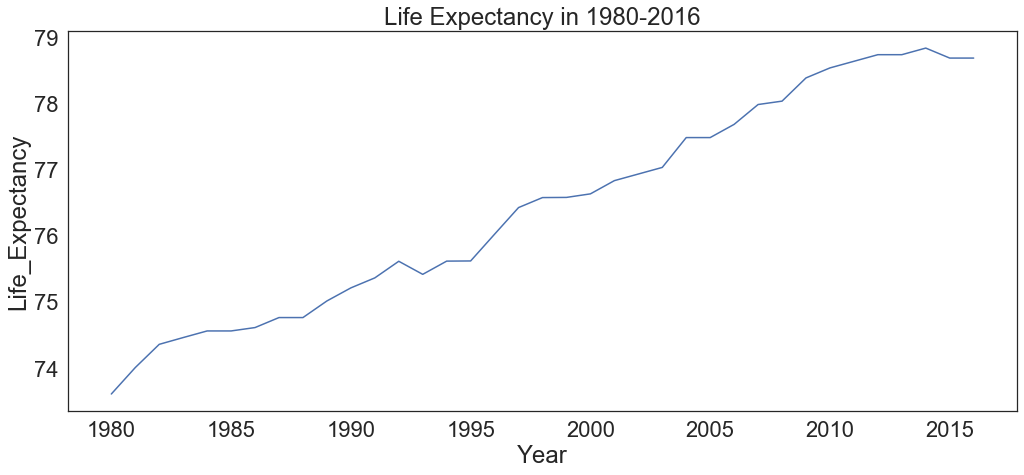

In [43]:
fig = sns.lineplot(x='Year', y='Life_Expectancy', data=datum)
fig.set_title('Life Expectancy in 1980-2016');

Life expectancy has steadily followed a relatively constant *upward* trend from 1980 to 2016. Looking closely at the plot, we can also see that there are periods where life expectancy slightly jumps: 1980 to 1985 & 1995-2000. Before beginning an EDA on our economic indicators, we can start hypothesizing that these are periods of healthcare policy changes, which leads to these changes in life expectancy. After 2010, life expectancy starts to flatten out around ~78.7-79 years.

#### Economic Indicator Variables

In our final dataset, we have three categories reiterating the raw values of healthcare spending in billions - annual percent changes, percentage breakdowns of national spending by category (personal health, administration cost, public health activities, investment) and per capita spending. In the next sections, we will analyze the values for each of these subcategories as they give different insight to the undelying variables.

##### Annual Percetange Changes on National Health Expenditure
- What is the overall trend on the annual percentage change in healthcare spending? Are there any periods of drastic percentage increases throughout the time period (1980-2016)?

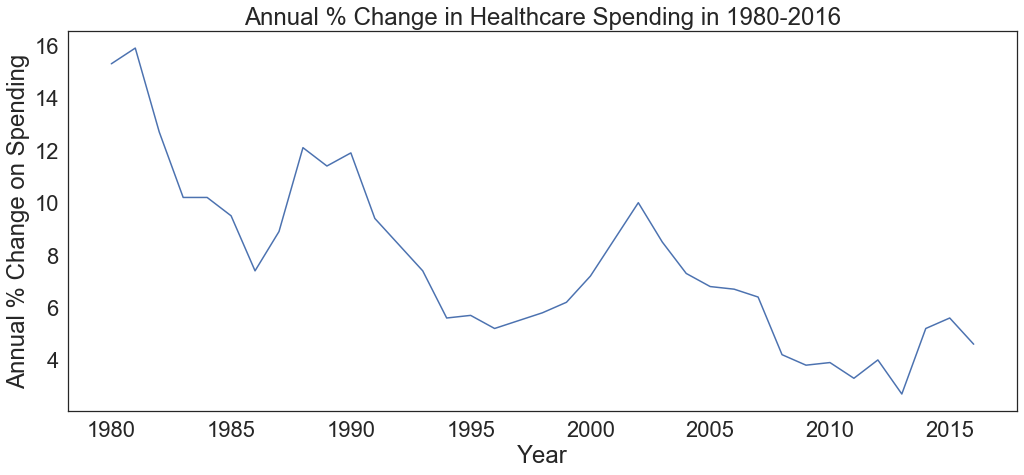

In [44]:
fig = sns.lineplot(x='Year', y='Annual_Pct_Change_Health_Spending', data=datum)
fig.set_title('Annual % Change in Healthcare Spending in 1980-2016');
fig.set_ylabel('Annual % Change on Spending');

The time trend on annual percentage changes in healthcare spending varies in 1980-2016. From life expectancy's line plot, we noticed increases in values in both 1980-1985 & 1990-1995. From the annual % changes on spending, we can see that previous to 1980, we have similar peaks. The following years after 1980 (up to 1985), this % change decreases steadily. Similarly, we see that previous to 1990, there are peaks of change in healthcare spending that decrease between 1990-1995. We can begin seeing that these peaks in increases of annual % changes on spending are most likely due to incoming changes in economic policy.

To validate our hypothesis, we briefly researched if there were any drastic economic policy changes in healthcare during 1980-1985 & 1990-1995. We find that, in early 1980s, U.S health spending increases subtantially so it makes sense this is seen in the data! Source: https://www.advisory.com/en/daily-briefing/2018/05/18/health-spending.

-  How does the overall annnual percentage change in healthcare spending break down into its subcategories - health consumption (personal healthcare, administration costs, public health activities) & investment towards healthcare?

We can plot these the breakdown of annual % changes of total health spending in the same plot to observe the time trend of each component. To decompose total spending, we will plot health consumption's three subcategories and the investment annual % changes. We also want to see if any of these subcomponents appear to be significant drivers of total spending.

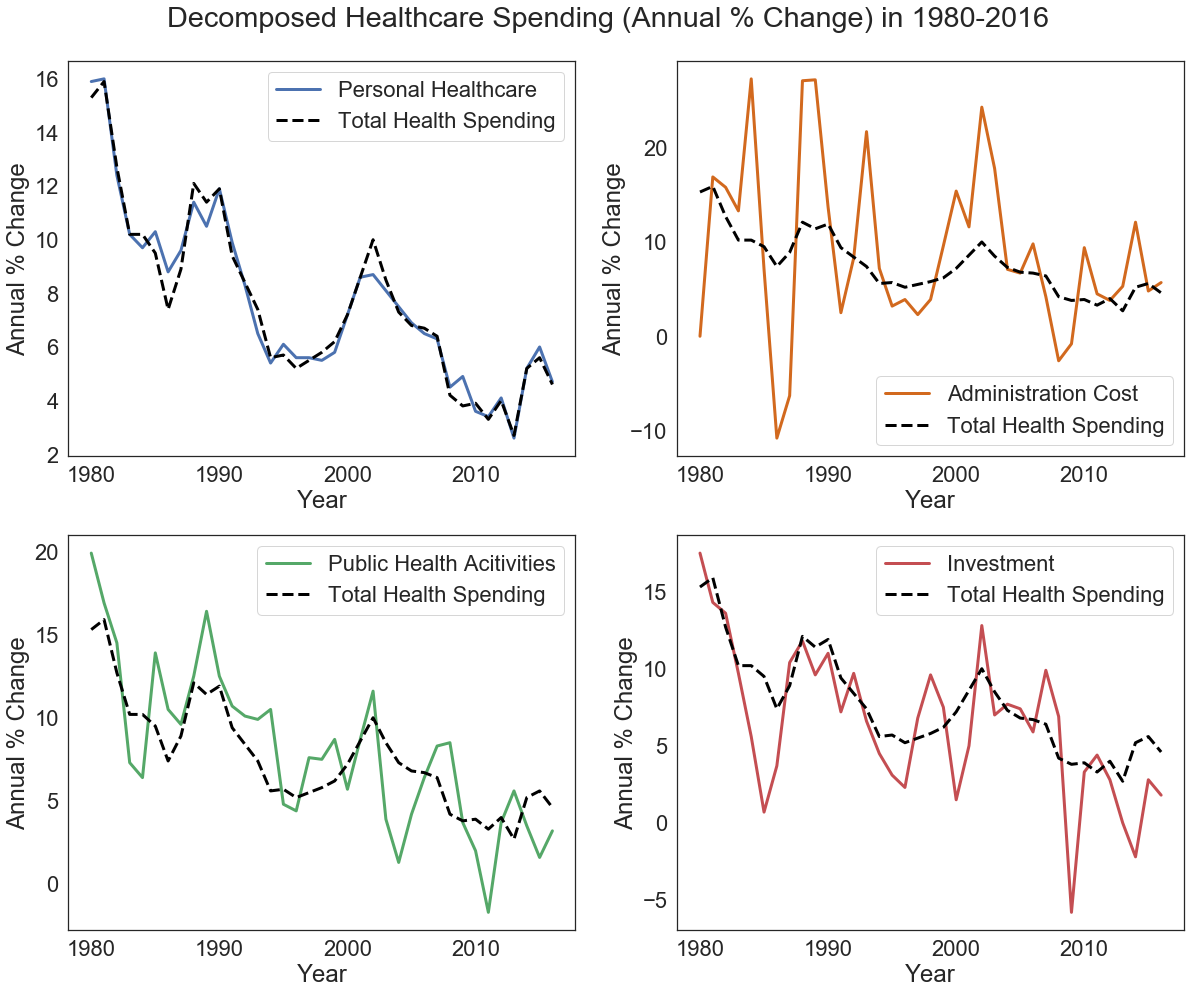

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# All below are the components of annual health spending - Personal Health, Administration Cost, 
# Public Health Acitivities, and Investment
fig1 = sns.lineplot(x='Year', y='Annual_Pct_Change_Personal_Health', data=datum, label='Personal Healthcare', linewidth=3, ax=ax1) # component 1
fig2 = sns.lineplot(x='Year', y='Annual_Pct_Change_Administration_Cost', data=datum, label='Administration Cost', linewidth=3, ax=ax2, color='chocolate') # component 2
fig3 = sns.lineplot(x='Year', y='Annual_Pct_Change_Public_Health_Activities', data=datum, label='Public Health Acitivities', linewidth=3, ax=ax3, color='g') # component 3
fig4 = sns.lineplot(x='Year', y='Annual_Pct_Change_Investment', data=datum, label='Investment', linewidth=3, ax=ax4, color='r') # component 4

# Changing labels & adding total spending % changes to each subplot to easily compare.
lst = [fig1, fig2, fig3, fig4]
axes = [ax1, ax2, ax3, ax4]
for i in range(4):
  lst[i].set_ylabel('Annual % Change');
  fig5 = sns.lineplot(x='Year', y='Annual_Pct_Change_Health_Spending', data=datum, legend=True, # total spending plot
               linewidth=3, linestyle='--', color='black', label='Total Health Spending', ax=axes[i])

plt.legend() 
plt.suptitle('Decomposed Healthcare Spending (Annual % Change) in 1980-2016');
plt.subplots_adjust(top=0.93)

From the plot, we can observe that annual % changes to personal health spending follow about the same trend to total spending (marked by dashed line.) On the other side, both public health activities and investment annual percent changes flucture a bit more. However, looking at the annual % changes in administration costs, we can see that this value fluctutuates *significantly.* We can hypothesize that changes in administration costs drive the same peaks/lows in total healthcare spending. This finiding also adds on to our previous inference - increases/decreases on life expectancy throughout the years that are due to healthcare spending are driven by periods of healthcare policy changes. This is an intuitive understanding, but it makes sense we can also see it through the data!

##### Percent Decomposition of Total Health Expenditure

In the previous section, we see the decomposition of total spending in *annual % change* terms and hypothesize that changes in administration costs may be the driver in overall changes. To further investigate which component of national health spending contributes more to total spending, we can also look at the percentage breakdown (with 100% = total spending.)

Similarly, we can decompose these factors and see their trend over time.

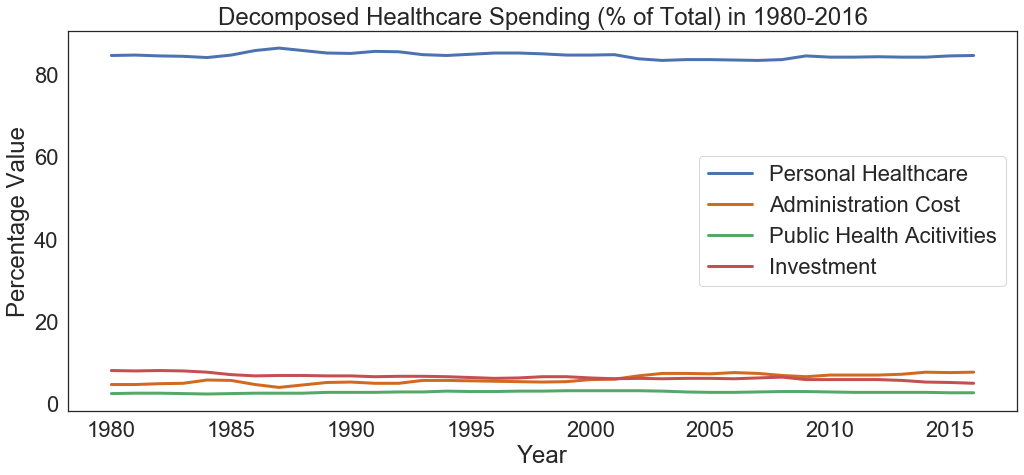

In [46]:
fig = sns.lineplot(x='Year', y='Percent_Spent_Personal_Health', data=datum, label='Personal Healthcare', linewidth=3)
sns.lineplot(x='Year', y='Percent_Spent_Administration_Cost', data=datum, label='Administration Cost', linewidth=3, color='chocolate') # component 2
sns.lineplot(x='Year', y='Percent_Spent_Public_Health_Activities', data=datum, label='Public Health Acitivities', linewidth=3, color='g') # component 3
sns.lineplot(x='Year', y='Percent_Spent_Investment', data=datum, label='Investment', linewidth=3, color='r') # component 4

fig.set_title('Decomposed Healthcare Spending (% of Total) in 1980-2016');
fig.set_ylabel('Percentage Value');

We can see that the major component in national health spending is *personal healthcare*. Previously, we saw that annual % in this component stay relatively close to total spending annual % changes - due to the proportion of this component this makes sense. As opposed to our initial hypothesis, we see that administration cost is *not* the major factor in total spending. However, the drastic annual % changes in administration cost may still be significant contributors to variation of total spending over the years. We can look closer at the 3 lowest percentage categories:


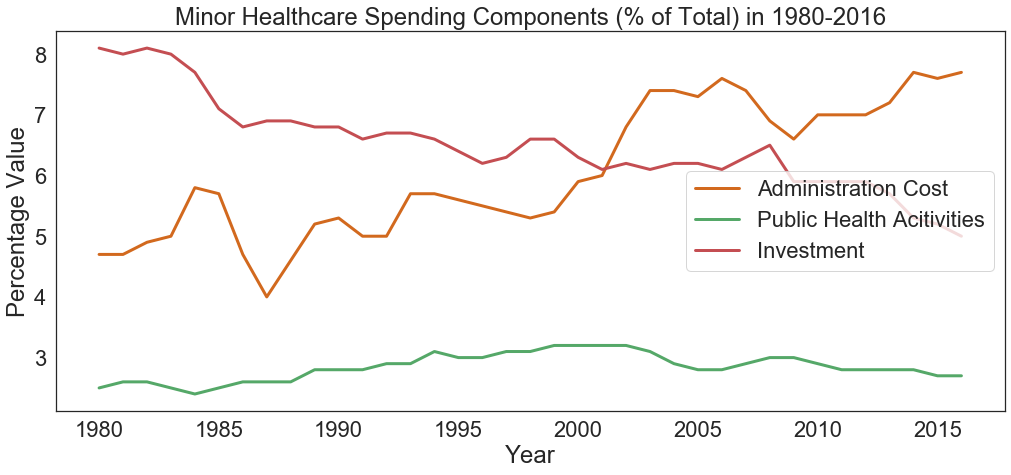

In [47]:
fig = sns.lineplot(x='Year', y='Percent_Spent_Administration_Cost', data=datum, label='Administration Cost', linewidth=3, color='chocolate')
sns.lineplot(x='Year', y='Percent_Spent_Public_Health_Activities', data=datum, label='Public Health Acitivities', linewidth=3, color='g')
sns.lineplot(x='Year', y='Percent_Spent_Investment', data=datum, label='Investment', linewidth=3, color='r')

fig.set_title('Minor Healthcare Spending Components (% of Total) in 1980-2016');
fig.set_ylabel('Percentage Value');

Looking closely at the minor components of national healh spending, we seethat the percentage of total spending pertaining to administrative cost has followed a *positive* trend over time. Percentage spent on public health acitivites has remained relatively constant. Lastly, percentage spent on government investment *decreased* over time.

##### GDP - Per Capita GDP & Per Capita National Health Spending
- What is the time trend of GDP in 1980-2016? 

GDP can be used to measure *quality of life*, which is a potential confounder to estimate life expectancy. For this reason, we want to examine the overall time trend & pattern of this variable in the time period given.

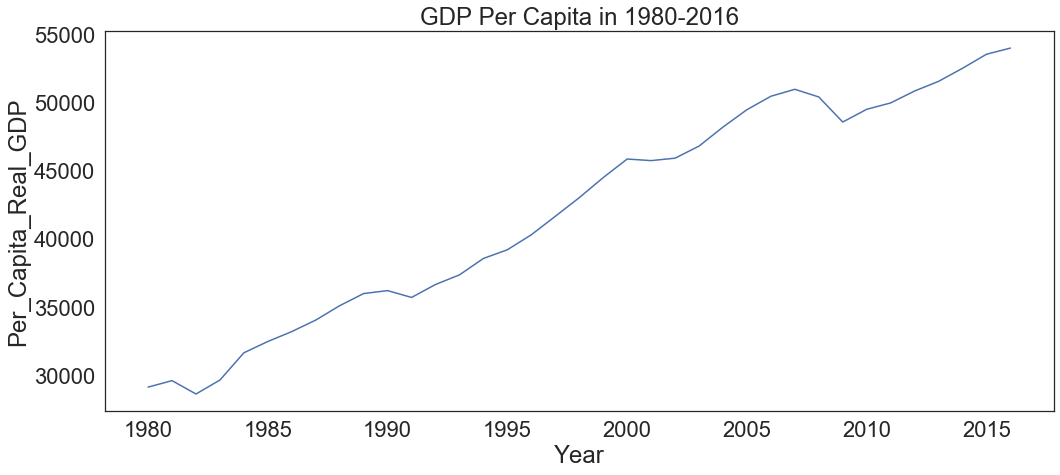

In [48]:
fig = sns.lineplot(x='Year', y='Per_Capita_Real_GDP', data=datum)
fig.set_title('GDP Per Capita in 1980-2016');

As opposed to what we have seen in life expectancy & annual % changes, GDP per capita does *not* follow similar peaks/lows. For instance, 1980-1985 was evaluated in our previous analysis as having peaks in life expectancy & annual % change in total health spending. Looking at GDP per capita, we can see that 1980-1985 there is a *decline* in GDP, which is most likely due to - Great Depression. We see a similar dip in 2007-2010 - the Housing Crisis.

- What is the breakdown of national health expenditure per capita?

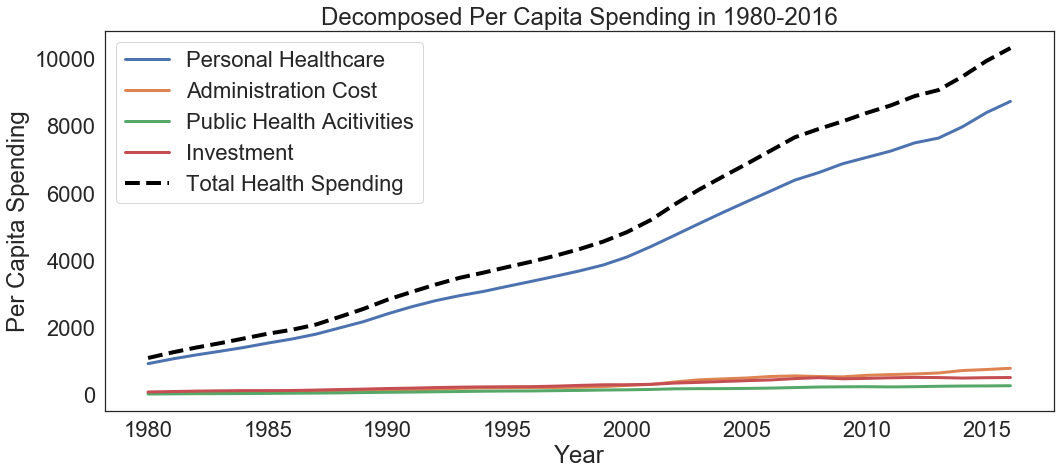

In [49]:
sns.lineplot(x='Year', y='Per_Capita_Personal_Health', data=datum, label='Personal Healthcare', linewidth=3) # component 1
sns.lineplot(x='Year', y='Per_Capita_Administration_Cost', data=datum, label='Administration Cost', linewidth=3) # component 2
sns.lineplot(x='Year', y='Per_Capita_Public_Health_Activities', data=datum, label='Public Health Acitivities', linewidth=3) # component 3
sns.lineplot(x='Year', y='Per_Capita_Investment', data=datum, label='Investment', linewidth=3) # component 4

fig = sns.lineplot(x='Year', y='Per_Capita_National_Health', data=datum,
                   linewidth=4, color='black', linestyle='--', label='Total Health Spending')

fig.set_title('Decomposed Per Capita Spending in 1980-2016');
fig.set_ylabel('Per Capita Spending');

From the dotted line, we can see the total per capita spending on national health has steadily increased throughout the years. The subcomponent of this value of Public Healthcare has following this *same* trend throughout the years. From what we have learned throughout the EDA, we can begin seeing that this component mostly likely has driven up total costs in this time period - cost of personal healthcare has steadily *increased* in 1980-2016. Again, we can look closer at the other three smaller components of total expenditure.

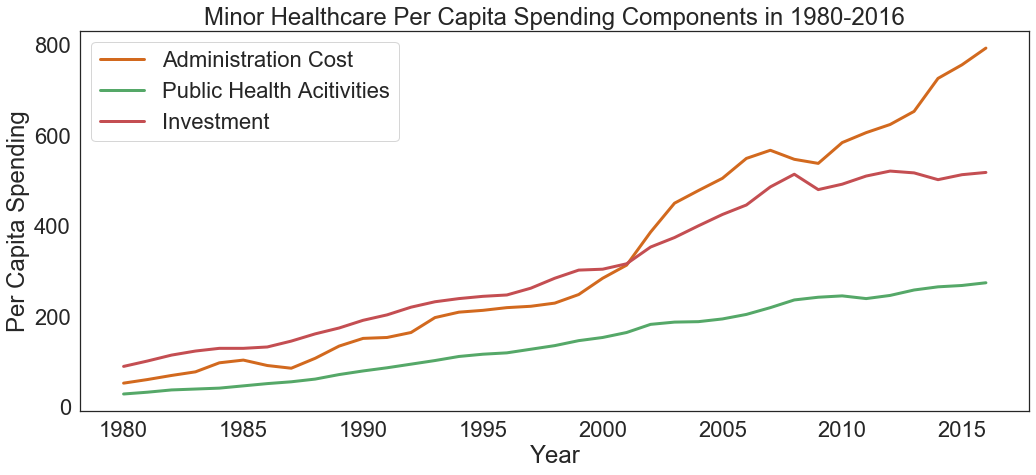

In [50]:
fig = sns.lineplot(x='Year', y='Per_Capita_Administration_Cost', data=datum, label='Administration Cost', linewidth=3, color='chocolate')
sns.lineplot(x='Year', y='Per_Capita_Public_Health_Activities', data=datum, label='Public Health Acitivities', linewidth=3, color='g')
sns.lineplot(x='Year', y='Per_Capita_Investment', data=datum, label='Investment', linewidth=3, color='r')

fig.set_title('Minor Healthcare Per Capita Spending Components in 1980-2016');
fig.set_ylabel('Per Capita Spending');

Looking closely at the smaller subcomponents, we can see a similar increasing trend throughout the years. In the previous section, we observed that the percentange of total spending on administration costs surpassed investment after 2000. In this plot, we can see a jump in administration costs per capita after 2000 as well.

##### Health Spending Raw Distributions - in trillions

To finalize our analysis in nation health expenditure, we will also plot the raw  values of total spending and its subcomponents **in trillions of dollars.**

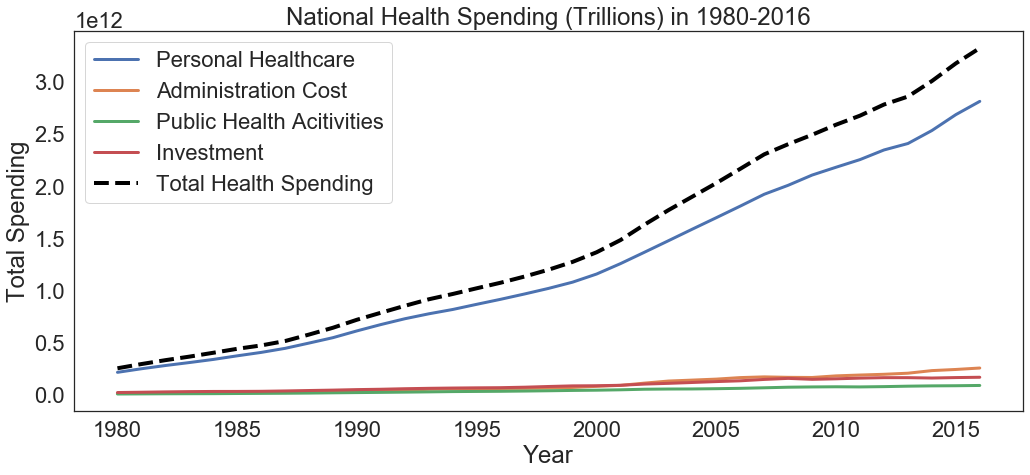

In [51]:
sns.lineplot(x='Year', y='Personal_Health', data=datum, label='Personal Healthcare', linewidth=3) 
sns.lineplot(x='Year', y='Administration_Cost', data=datum, label='Administration Cost', linewidth=3)
sns.lineplot(x='Year', y='Public_Health_Activities', data=datum, label='Public Health Acitivities', linewidth=3)
sns.lineplot(x='Year', y='Investment', data=datum, label='Investment', linewidth=3)

fig = sns.lineplot(x='Year', y='Health_Spending', data=datum,
                   linewidth=4, color='black', linestyle='--', label='Total Health Spending')

fig.set_title('National Health Spending (Trillions) in 1980-2016');
fig.set_ylabel('Total Spending');

Looking closely at subcomponents, we see the same trend as previous sections.

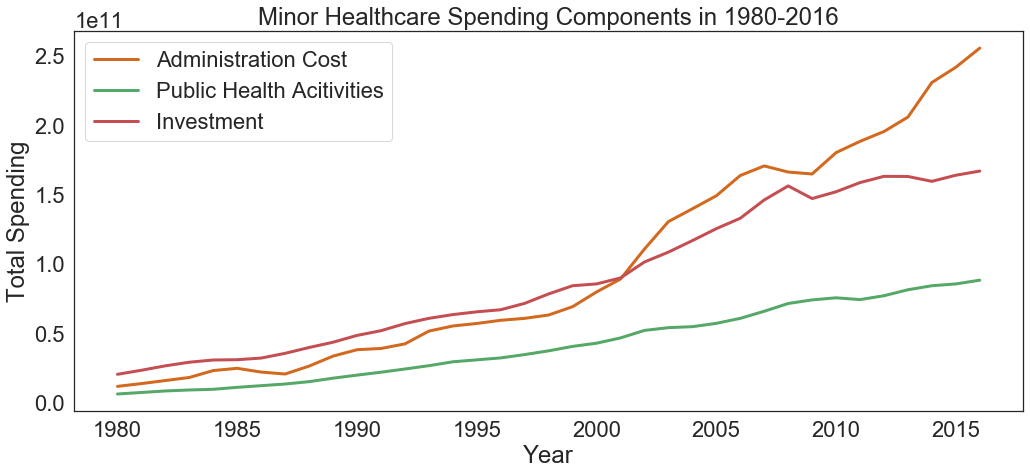

In [52]:
fig = sns.lineplot(x='Year', y='Administration_Cost', data=datum, label='Administration Cost', linewidth=3, color='chocolate')
sns.lineplot(x='Year', y='Public_Health_Activities', data=datum, label='Public Health Acitivities', linewidth=3, color='g')
sns.lineplot(x='Year', y='Investment', data=datum, label='Investment', linewidth=3, color='r')

fig.set_title('Minor Healthcare Spending Components in 1980-2016');
fig.set_ylabel('Total Spending');

#### Health Indicator Variables

In the previous section, we have seen the patterns of health spending throughout 1980-2016. Our initial hypothesis states that increased spending leads to higher quality in health spending. However, we can investigate if *health* statistics in the U.S reflect this idea. We will look at the four statistics in our dataset: youth mortality rates, vaccination rates, percent uninsured, and annual deaths in the U.S.

- Youth Mortality Rates

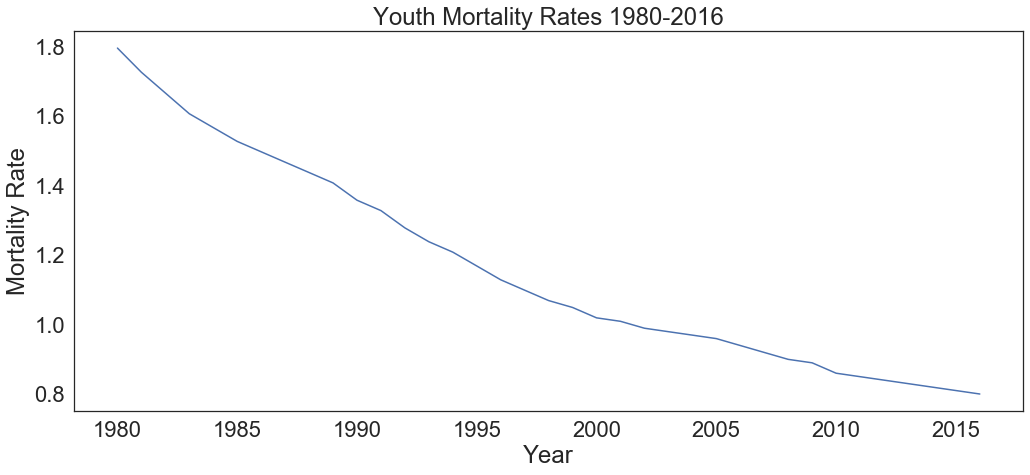

In [53]:
fig = sns.lineplot(x='Year', y='Youth_Mortality_Rate', data=datum)
fig.set_title('Youth Mortality Rates 1980-2016');
fig.set_ylabel('Mortality Rate');

We can see that this statistic has steadily *decreased* over the years. Adding on to an increase of healthcare quality, and therefore, quality of life.

- Vaccination Rate - Share of one-years olds vaccinated.

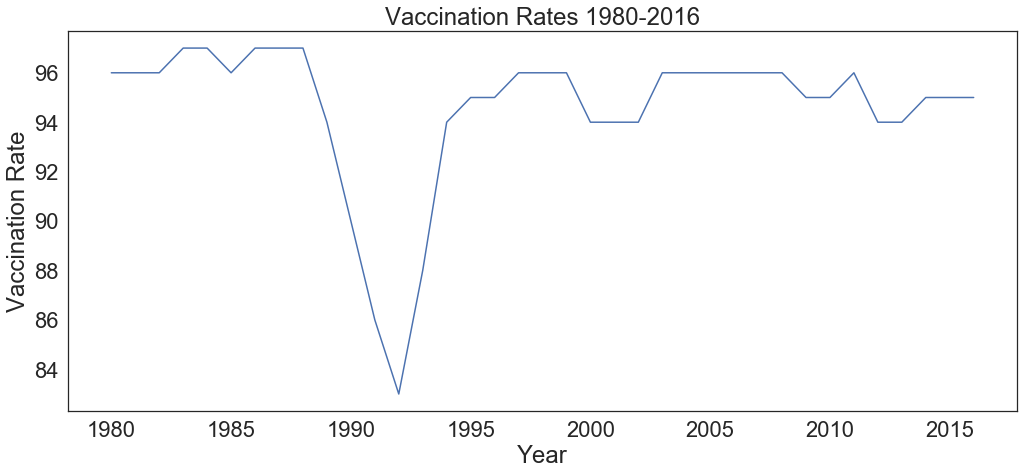

In [54]:
fig = sns.lineplot(x='Year', y='Vaccination_Rate', data=datum)
fig.set_title('Vaccination Rates 1980-2016');
fig.set_ylabel('Vaccination Rate');

In [55]:
print("The year with a large decrease in vaccination rates is " + str(datum['Year'].iloc[datum['Vaccination_Rate'].idxmin()]))

The year with a large decrease in vaccination rates is 1992.0


In [56]:
datum[(datum['Year'] >= 1990) & (datum['Year'] <= 1995)][['Year','Vaccination_Rate']]

,Year,Vaccination_Rate
10,1990.0,90.0
11,1991.0,86.0
12,1992.0,83.0
13,1993.0,88.0
14,1994.0,94.0
15,1995.0,95.0


From this plot, we can see that vaccination rates stay  around ~96% overall. However, there is a large drop around 1990 where vaccination rates fall to 83%. We can research this phenomenom and see that there was an Anti-Vaccination movement in the 1990s[1] fueled by a measles virus outbreak in 1989 in the U.S[2]. This explains the dip we see in the data and it is an important note to add in our model design.

Sources: 
- [1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6122668/
- [2] https://www.cdc.gov/mmwr/preview/mmwrhtml/00001522.htm#:~:text=of%20e%2Dmail.-,Measles%20%2D%2D%20United%20States%2C%20First%2026%20Weeks%2C%201989,associated%20deaths%20were%20also%20reported.


- Percent of Population Uninsured

In our background, we briefly talk about the increased cost of healthcare in the U.S, where an average citizen is not able to afford a lot of the basic services that other countries may have easily available. We can hypothesize that the percent uninsured has *increased* throughout the years due to the large increase in healthcare costs. However, we also know from general knowledge of President Obama's healthcare reform plan introduced in 2010[3], which would *decrease* the percentage of U.S population uninsured. Before looking at the plot of this variable throughout the years, we expect the following result: steady increase from 1980 to 2010 and a decrease after 2010.

Source: [3] https://www.thebalance.com/obama-s-health-care-reform-plan-3305753#:~:text=President%20Barack%20Obama's%20health%20care,more%20commonly%20known%20as%20Obamacare

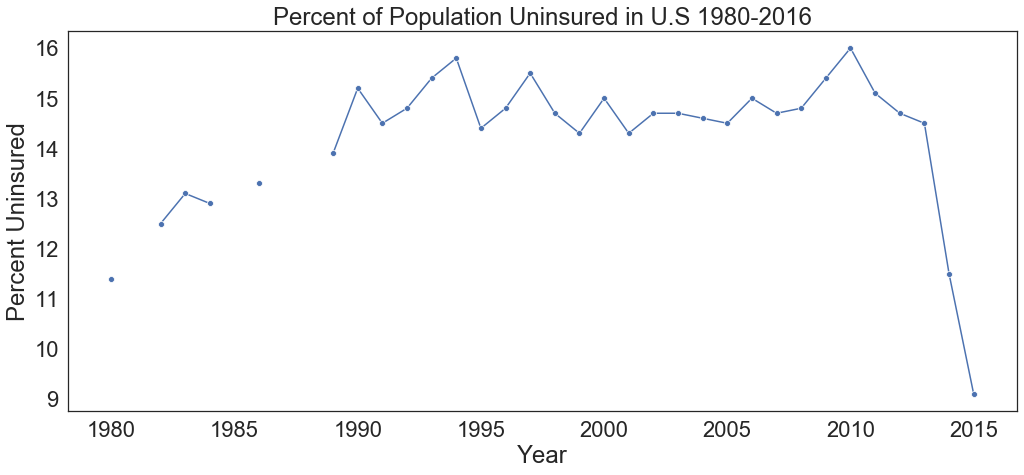

In [57]:
d = datum.copy()
d['Pct_Uninsured_Rate'] = d['Pct_Uninsured_Rate'].fillna(np.inf) # replacing nans with np.inf so nan values do not show in plot.

fig = sns.lineplot(x='Year', y='Pct_Uninsured_Rate', data=d, marker='o')
fig.set_title('Percent of Population Uninsured in U.S 1980-2016');
fig.set_ylabel('Percent Uninsured');

We can see this approximate pattern when looking at the plot! Uninsured rates go up (overall) from 1980-2010 and we see a large decrease in 2010. It is important to note that we see tons of 'dips' throughout the time period - there are small percentage movements along the years of 1990-2005. During this time period we see that the percentage uninsured has stayed around a narrow window of ~[14-16].

- Annual Deaths - in billions

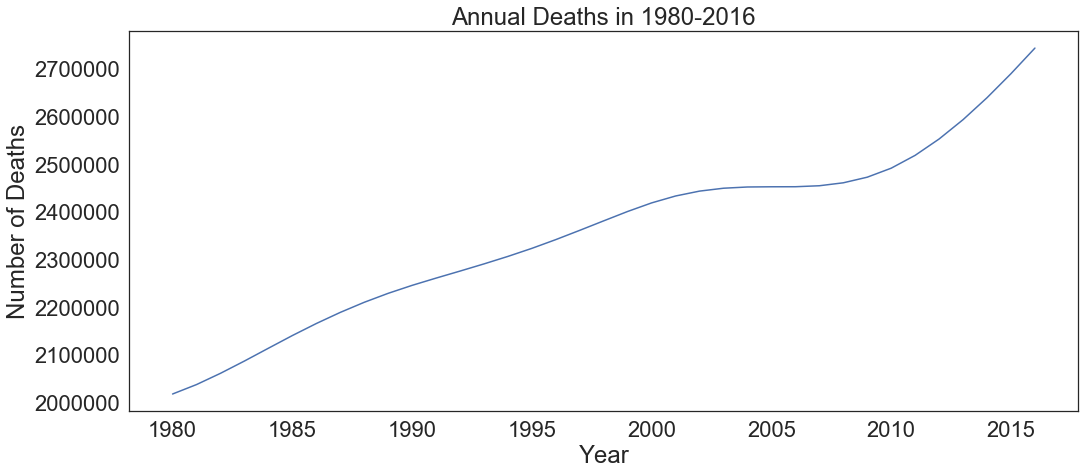

In [58]:
fig = sns.lineplot(x='Year', y='Annual_Deaths', data=datum)
fig.set_title('Annual Deaths in 1980-2016');
fig.set_ylabel('Number of Deaths');

Last, we can analyze the annual number of deaths (in billions) in the U.S. Rather than seeing a downward trend throughout the time period, we can see that this variable reflects an *increasing* trend througout 1980-2016. However, this variable might be heavily influenced by multiple counfounders (crime rates, etc.) Since this variable only reflects the overall deaths in the country rather than hospital deaths (or youth mortality rates, as seen previously), we might conclude that this variable may *not* be the best indicator for life expectancy in a model.

### Relationships Between Variables

In this section, we will explore the between-variable relationships (economic & health indicators) to explore and prevent collinearity in model design. Additionally, we will begin exploring the relationship between these predictors and our target variable, life expectancy.

#### Relationship between Individual Variables

##### Relationship between Per Capita Real GDP and percent of GDP spent on National Health

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


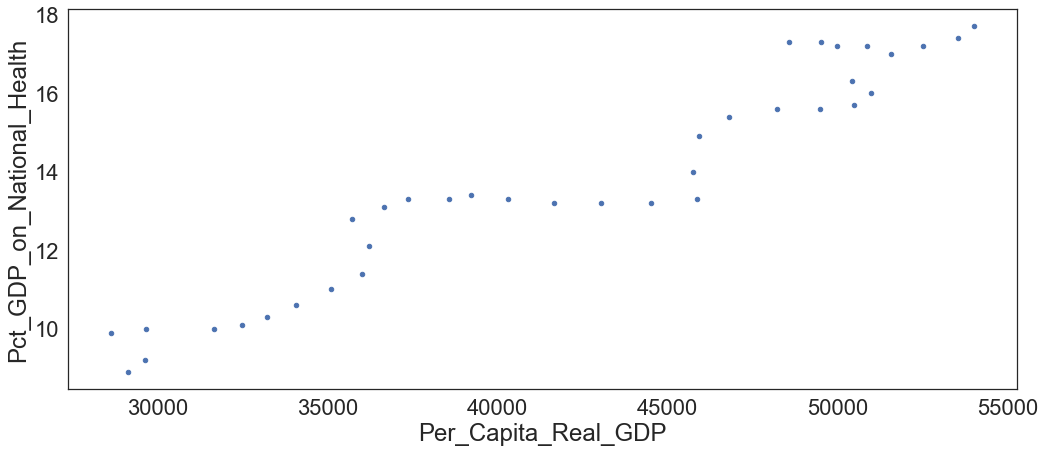

In [59]:
datum.plot.scatter(x='Per_Capita_Real_GDP', y='Pct_GDP_on_National_Health');

As per capita real GDP has increased, the percent of GDP spent on national health has increased as well

##### Relationship between Percent GDP spent on National Health and Life Expectancy

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


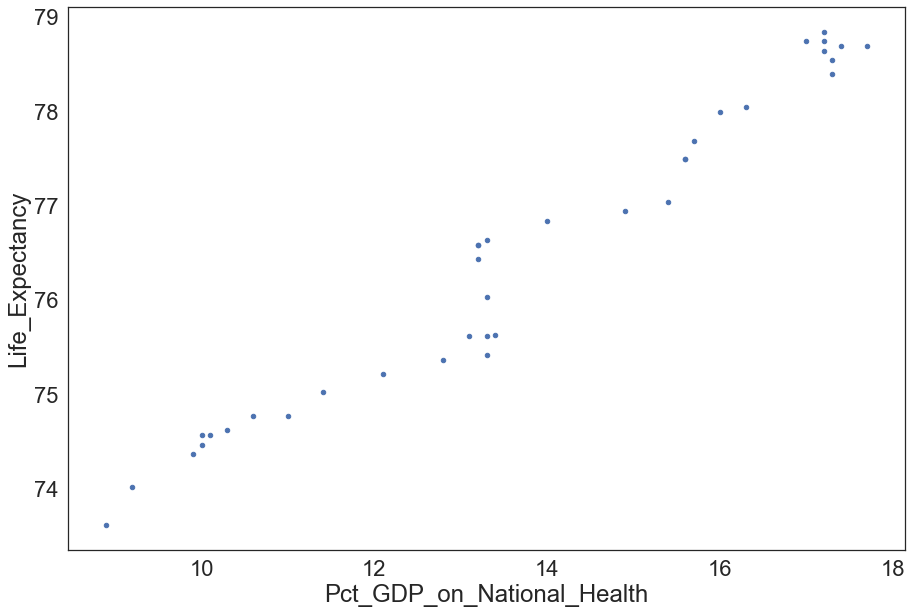

In [60]:
datum.plot.scatter(x='Pct_GDP_on_National_Health', y='Life_Expectancy', figsize=(15,10));

As percent GDP spent on national health has increased, life expectancy has increased as well

##### Relationship between Percent GDP spent on National Health and Youth Mortality Rate

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


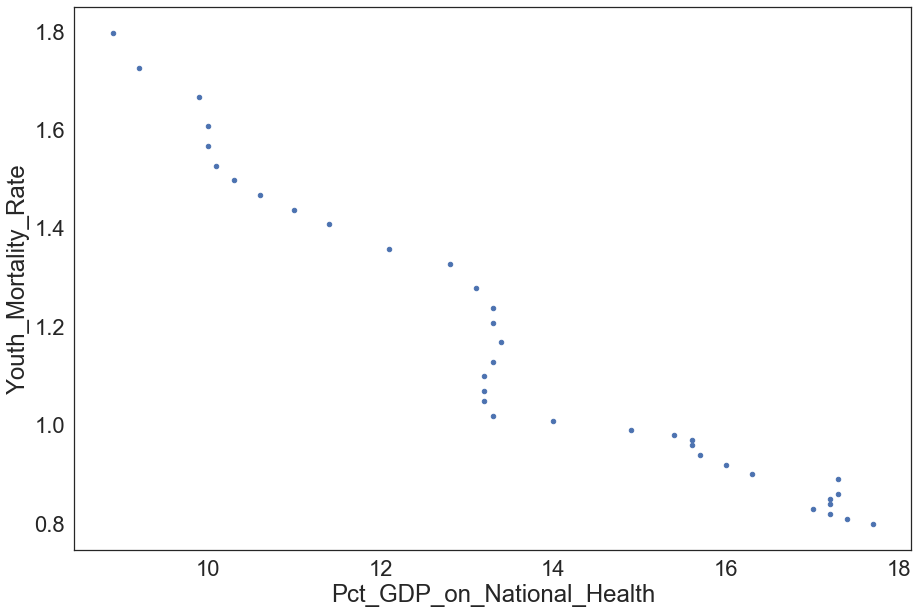

In [61]:
datum.plot.scatter(x='Pct_GDP_on_National_Health', y='Youth_Mortality_Rate', figsize=(15,10));

As percent GDP spent on national health has increased, youth mortality rate has decreased with a period where the youth mortality rate decreased while the percent GDP spent on health remained constant

##### Relationship between Percent GDP spent on National Health and Percent Uninsured Rate

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


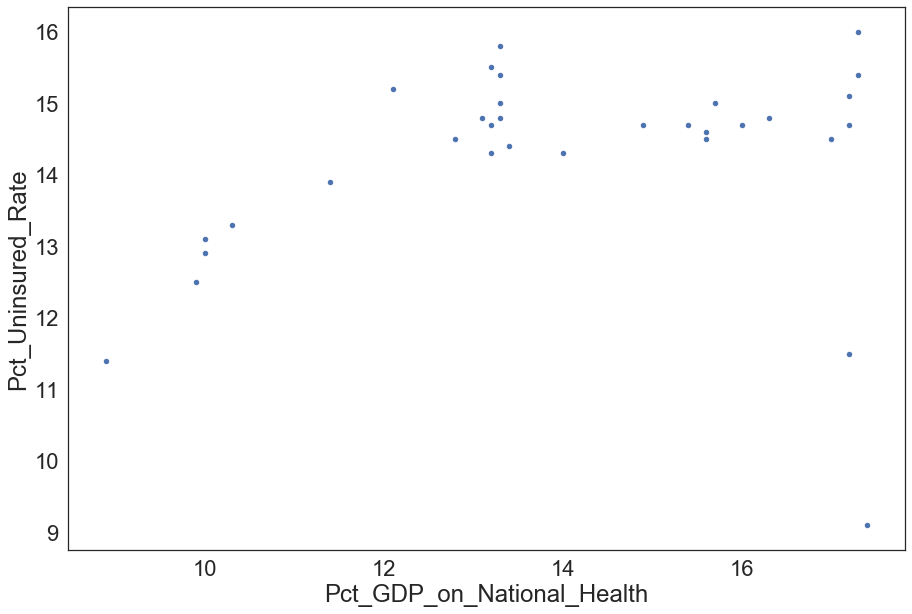

In [62]:
datum.plot.scatter(x='Pct_GDP_on_National_Health', y='Pct_Uninsured_Rate', figsize=(15,10));

As percent GDP spent on national health has increased, the percent uninsured rate has gone up meaning that the spending is not giving people more insurance

##### Relationship between Percent GDP spent on National Health and Vaccination Rate

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


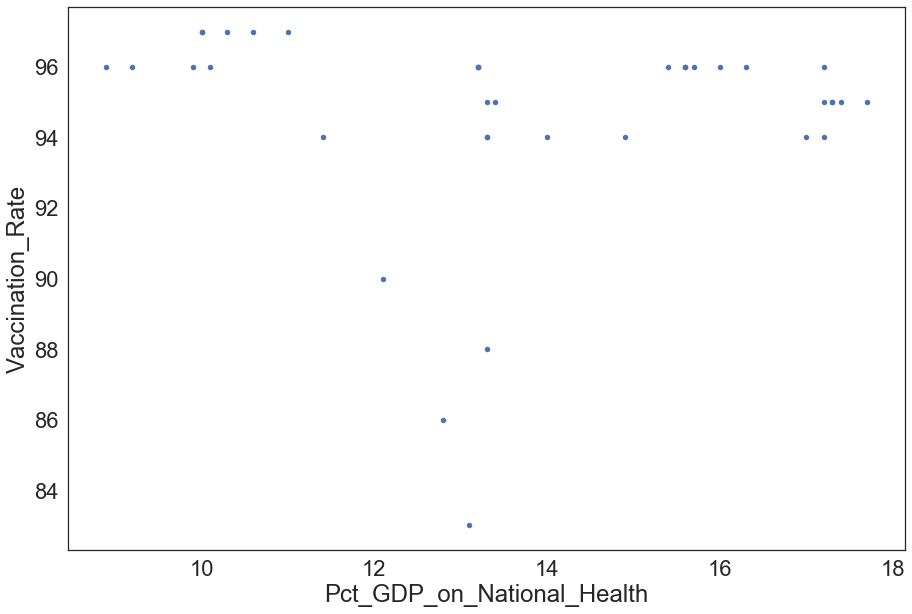

In [63]:
datum.plot.scatter(x='Pct_GDP_on_National_Health', y='Vaccination_Rate', figsize=(15,10));

Vaccination Rate has remained steady while percent spent on GDP has gone up

##### Relationship between Health Spending and Population

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


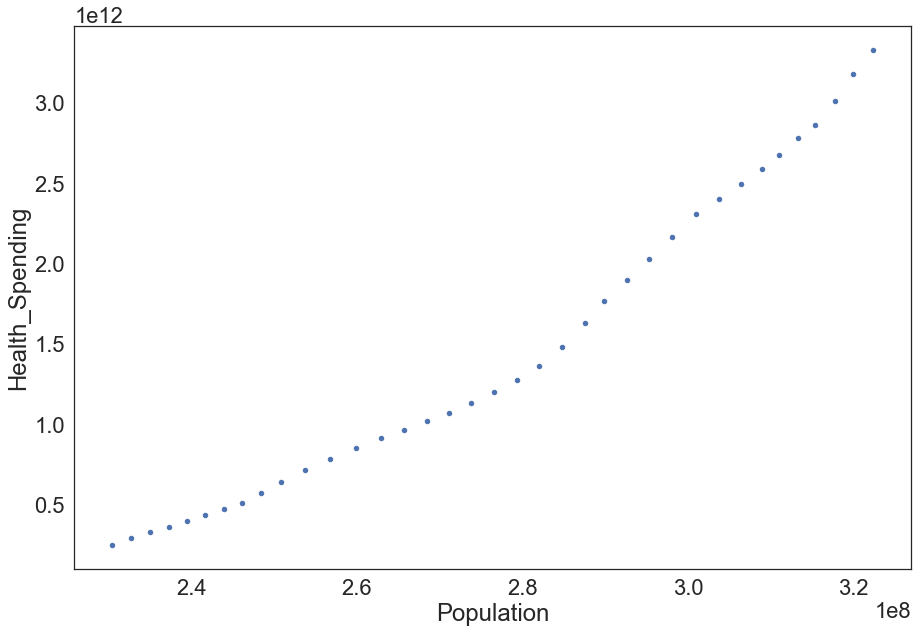

In [64]:
datum.plot.scatter(x='Population', y='Health_Spending', figsize=(15,10));

As the population has increased, the health spending in the country has increased as well 

##### Relationship between Administration Costs and Percent Uninsured Rate


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


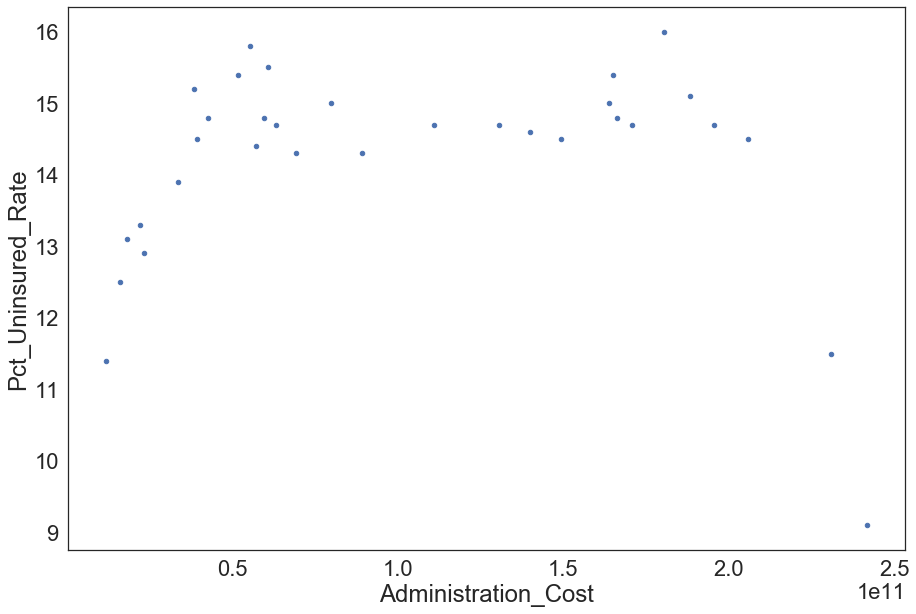

In [65]:
datum.plot.scatter(x='Administration_Cost', y='Pct_Uninsured_Rate', figsize=(15,10));

With a few outliers, the general trend is that administration costs has correlation with a higher percent uninsured rate.

#### Relationship between Multiple Variables

##### Relationship between Per Capita Real GDP and Per Capita Personal Health Spending, Per Capita Administration Costs, Per Capita Public Health Activities Spending, and Per Capita Investment Spending

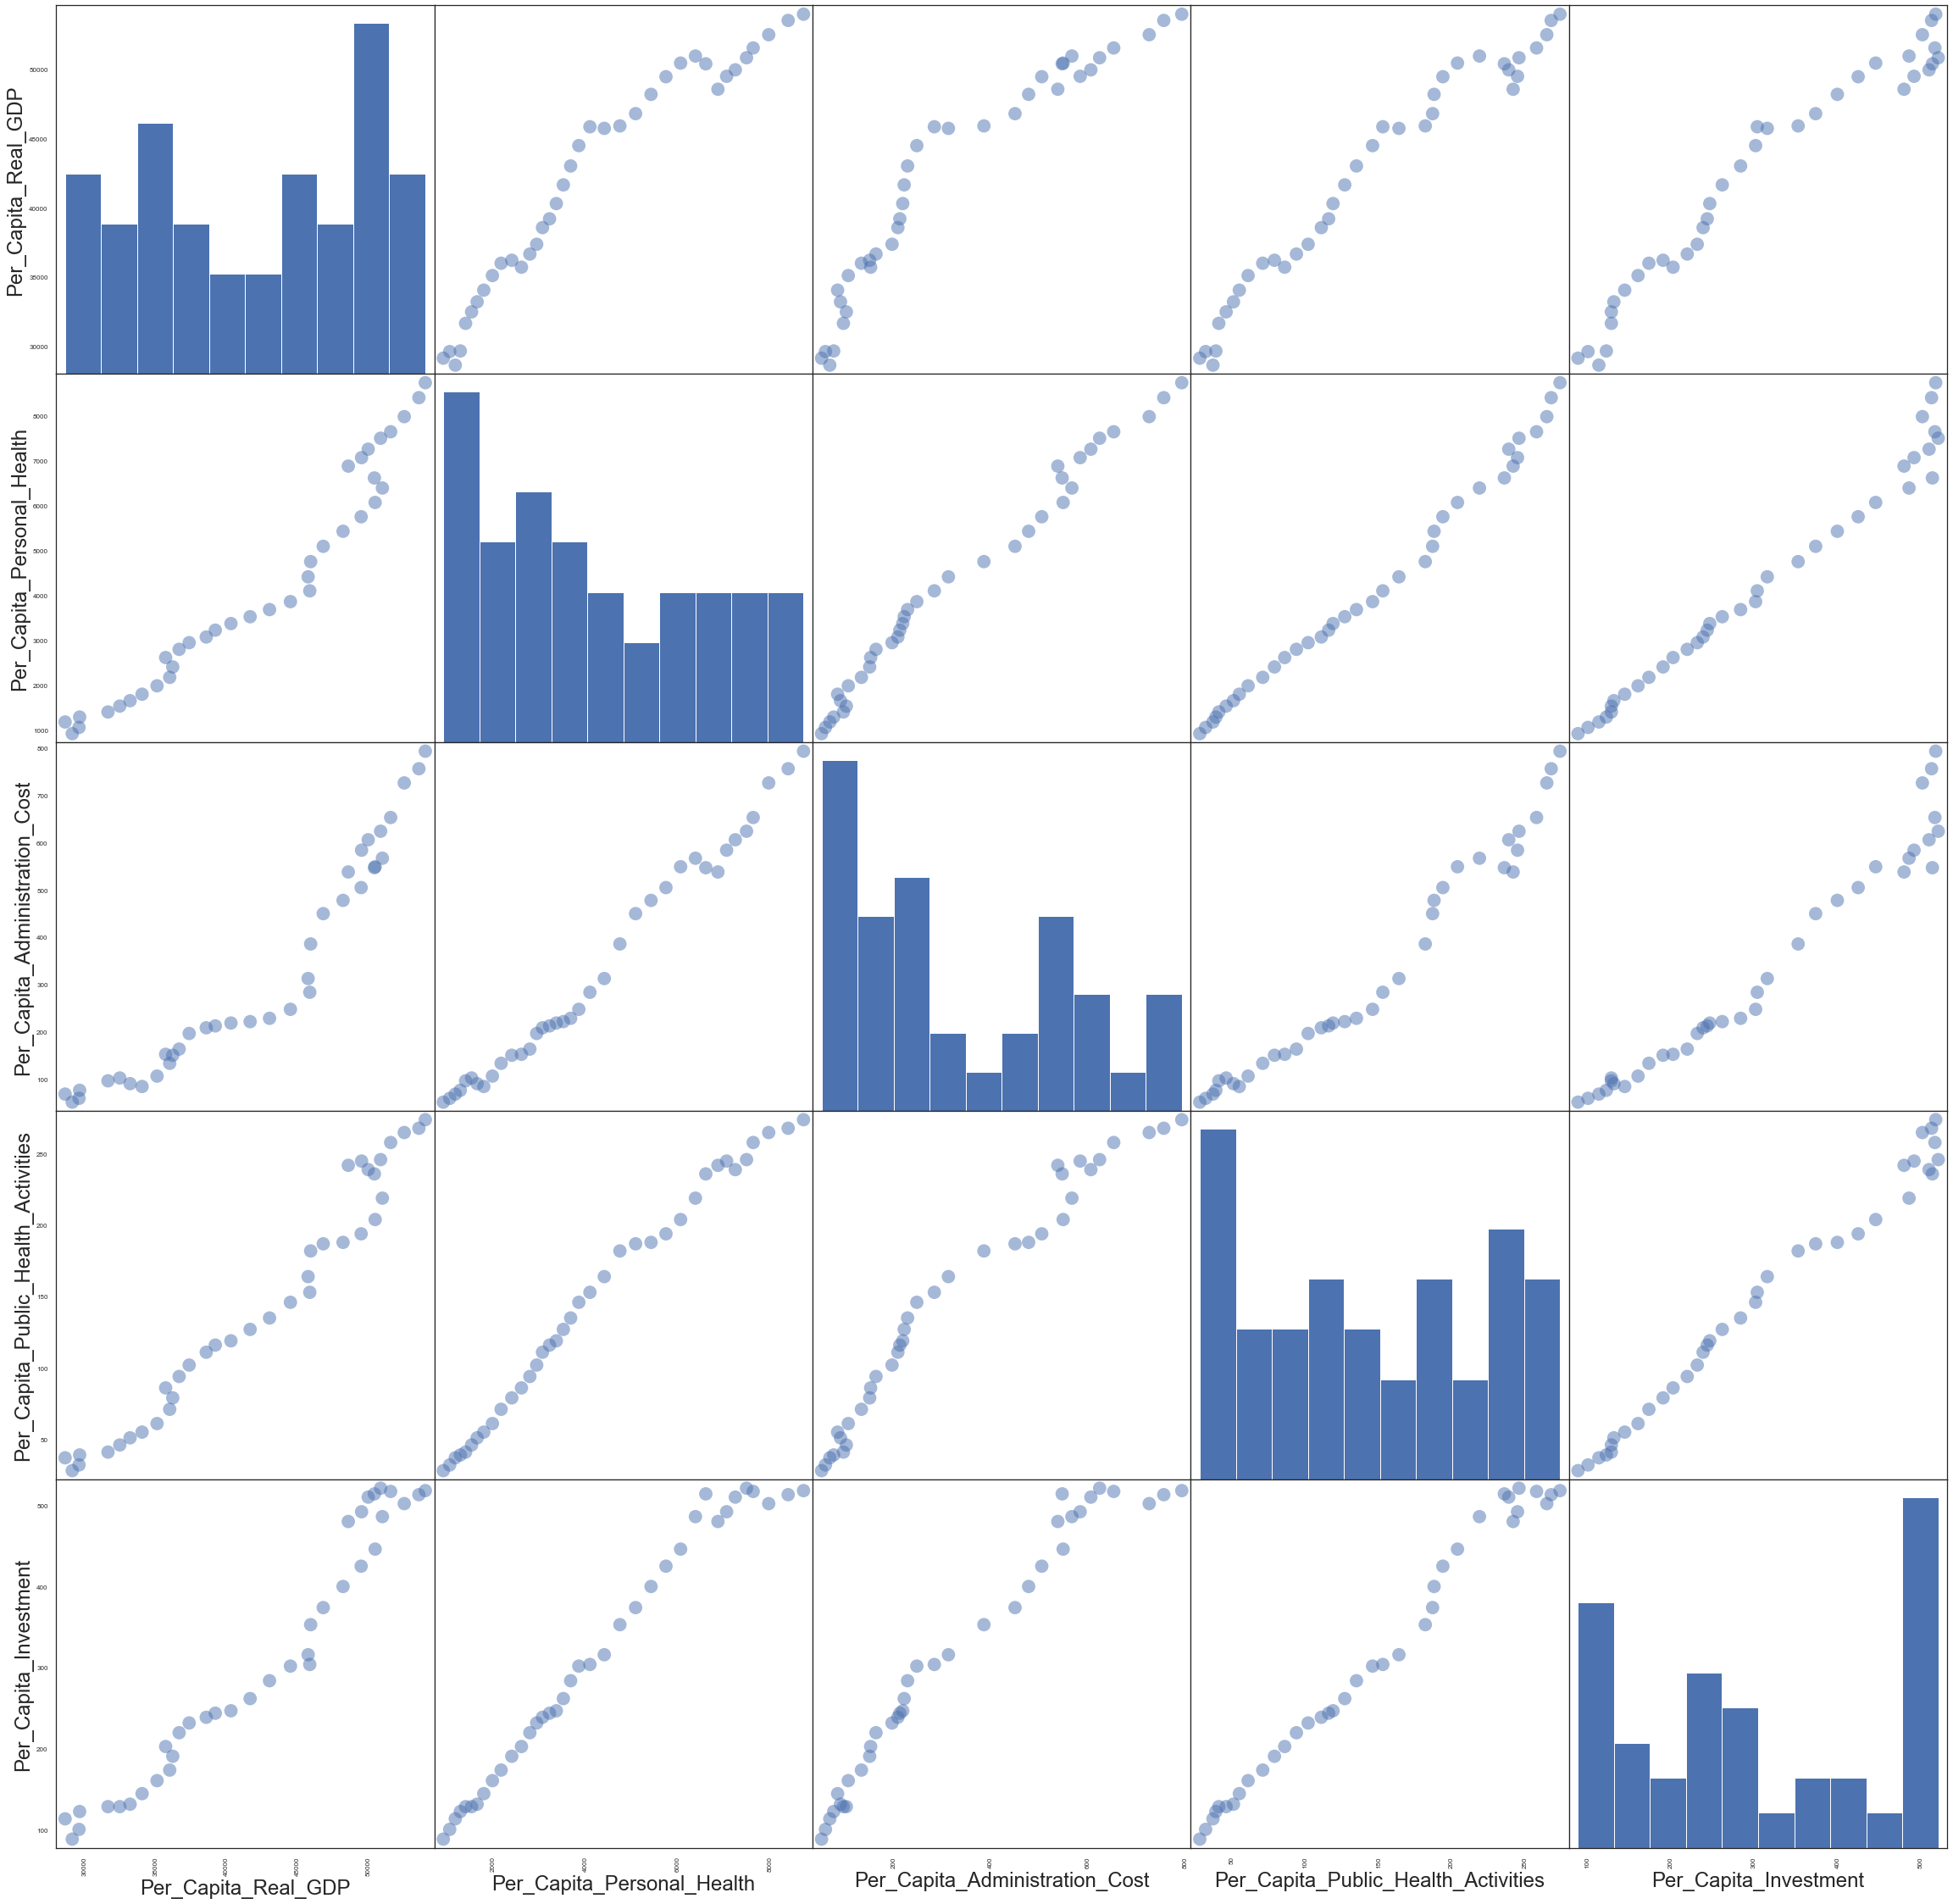

In [66]:
pd.plotting.scatter_matrix(datum[['Per_Capita_Real_GDP', 'Per_Capita_Personal_Health', 'Per_Capita_Administration_Cost', 
                               'Per_Capita_Public_Health_Activities', 'Per_Capita_Investment']], figsize=(40,40), s=1000);

As Per Capita Real GDP increased, spending on per capita health services like administration costs have increased as well. Spending on all health services were positively correlaed as higher administration costs correlated with higher investment, public activities, etc. 

##### Relationship between Annual Percent Change  GDP and Annual Percent Change Personal Health Spending, Annual Percent Change Administration Costs, Annual Percent Change Public Health Activities Spending, and Annual Percent Change Investment Spending

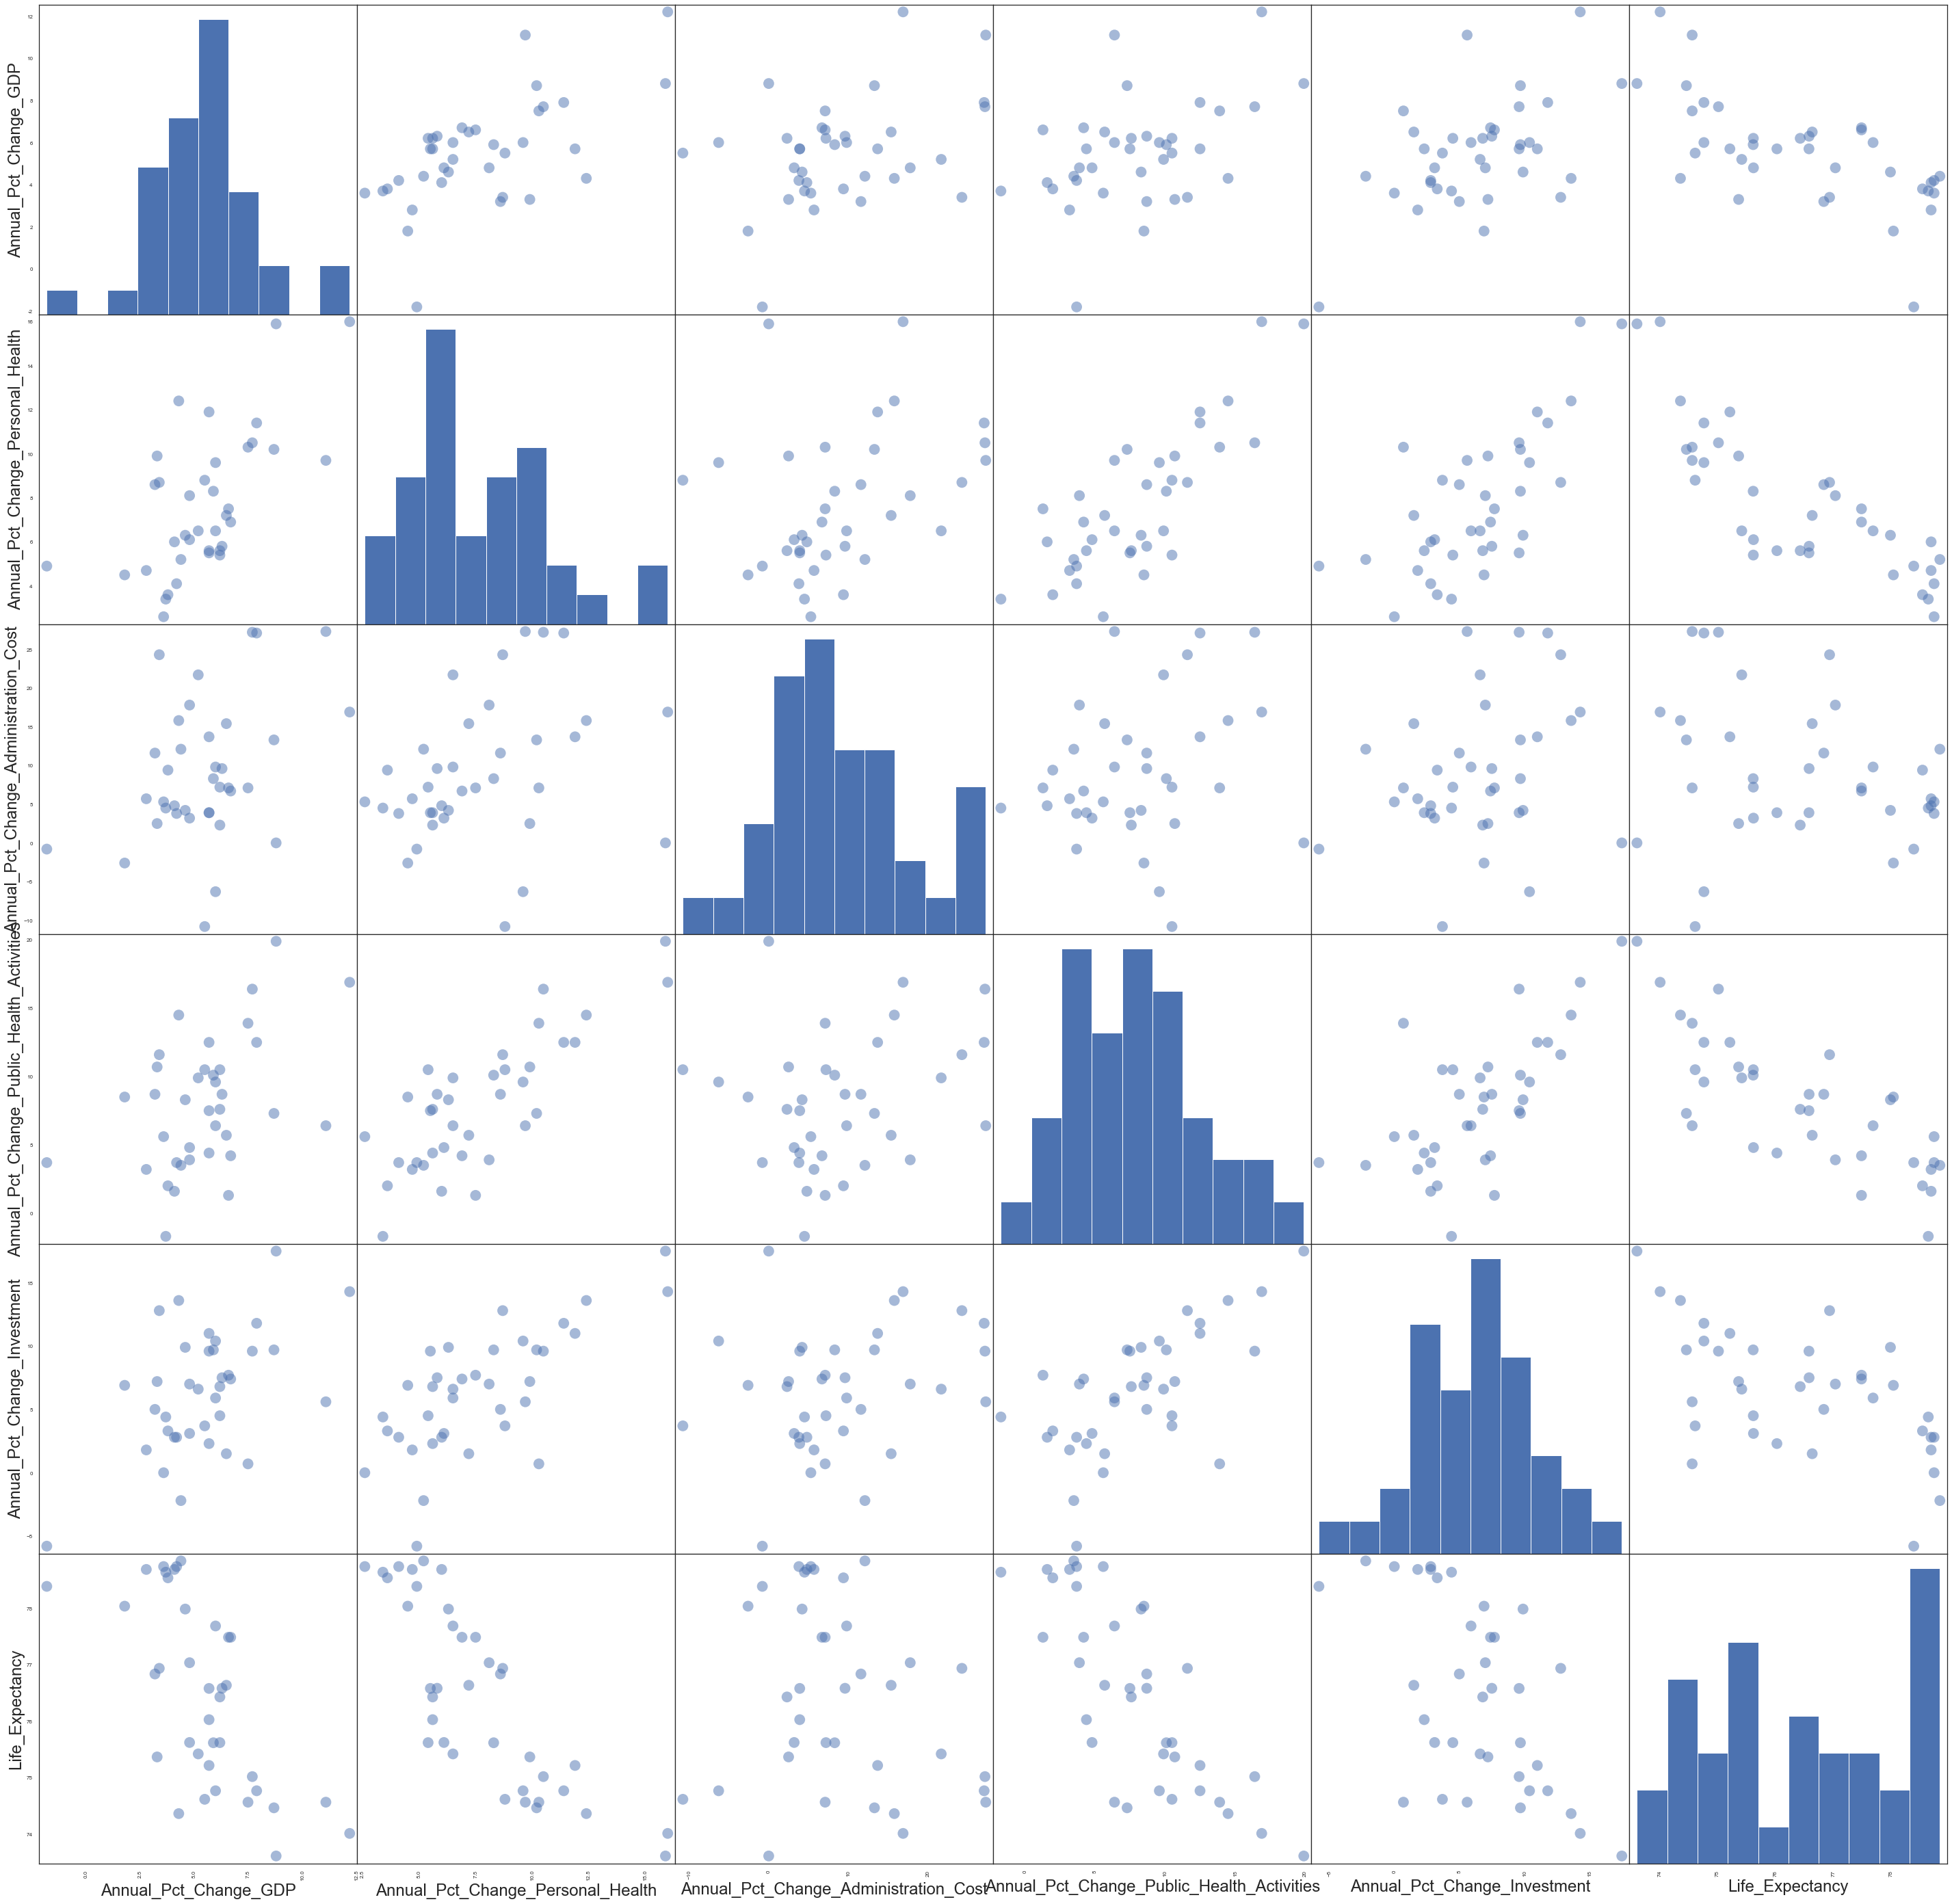

In [67]:
pd.plotting.scatter_matrix(datum[['Annual_Pct_Change_GDP', 'Annual_Pct_Change_Personal_Health', 'Annual_Pct_Change_Administration_Cost', 
                               'Annual_Pct_Change_Public_Health_Activities', 'Annual_Pct_Change_Investment', 'Life_Expectancy']], figsize=(50,50), s=1000);

As percent change in GDP went up, it correlated with higher percent increase in health spending across all categories of spending. The relationship between different categories were also positively correlated

##### Relationship between percent of spending in each category of health spending

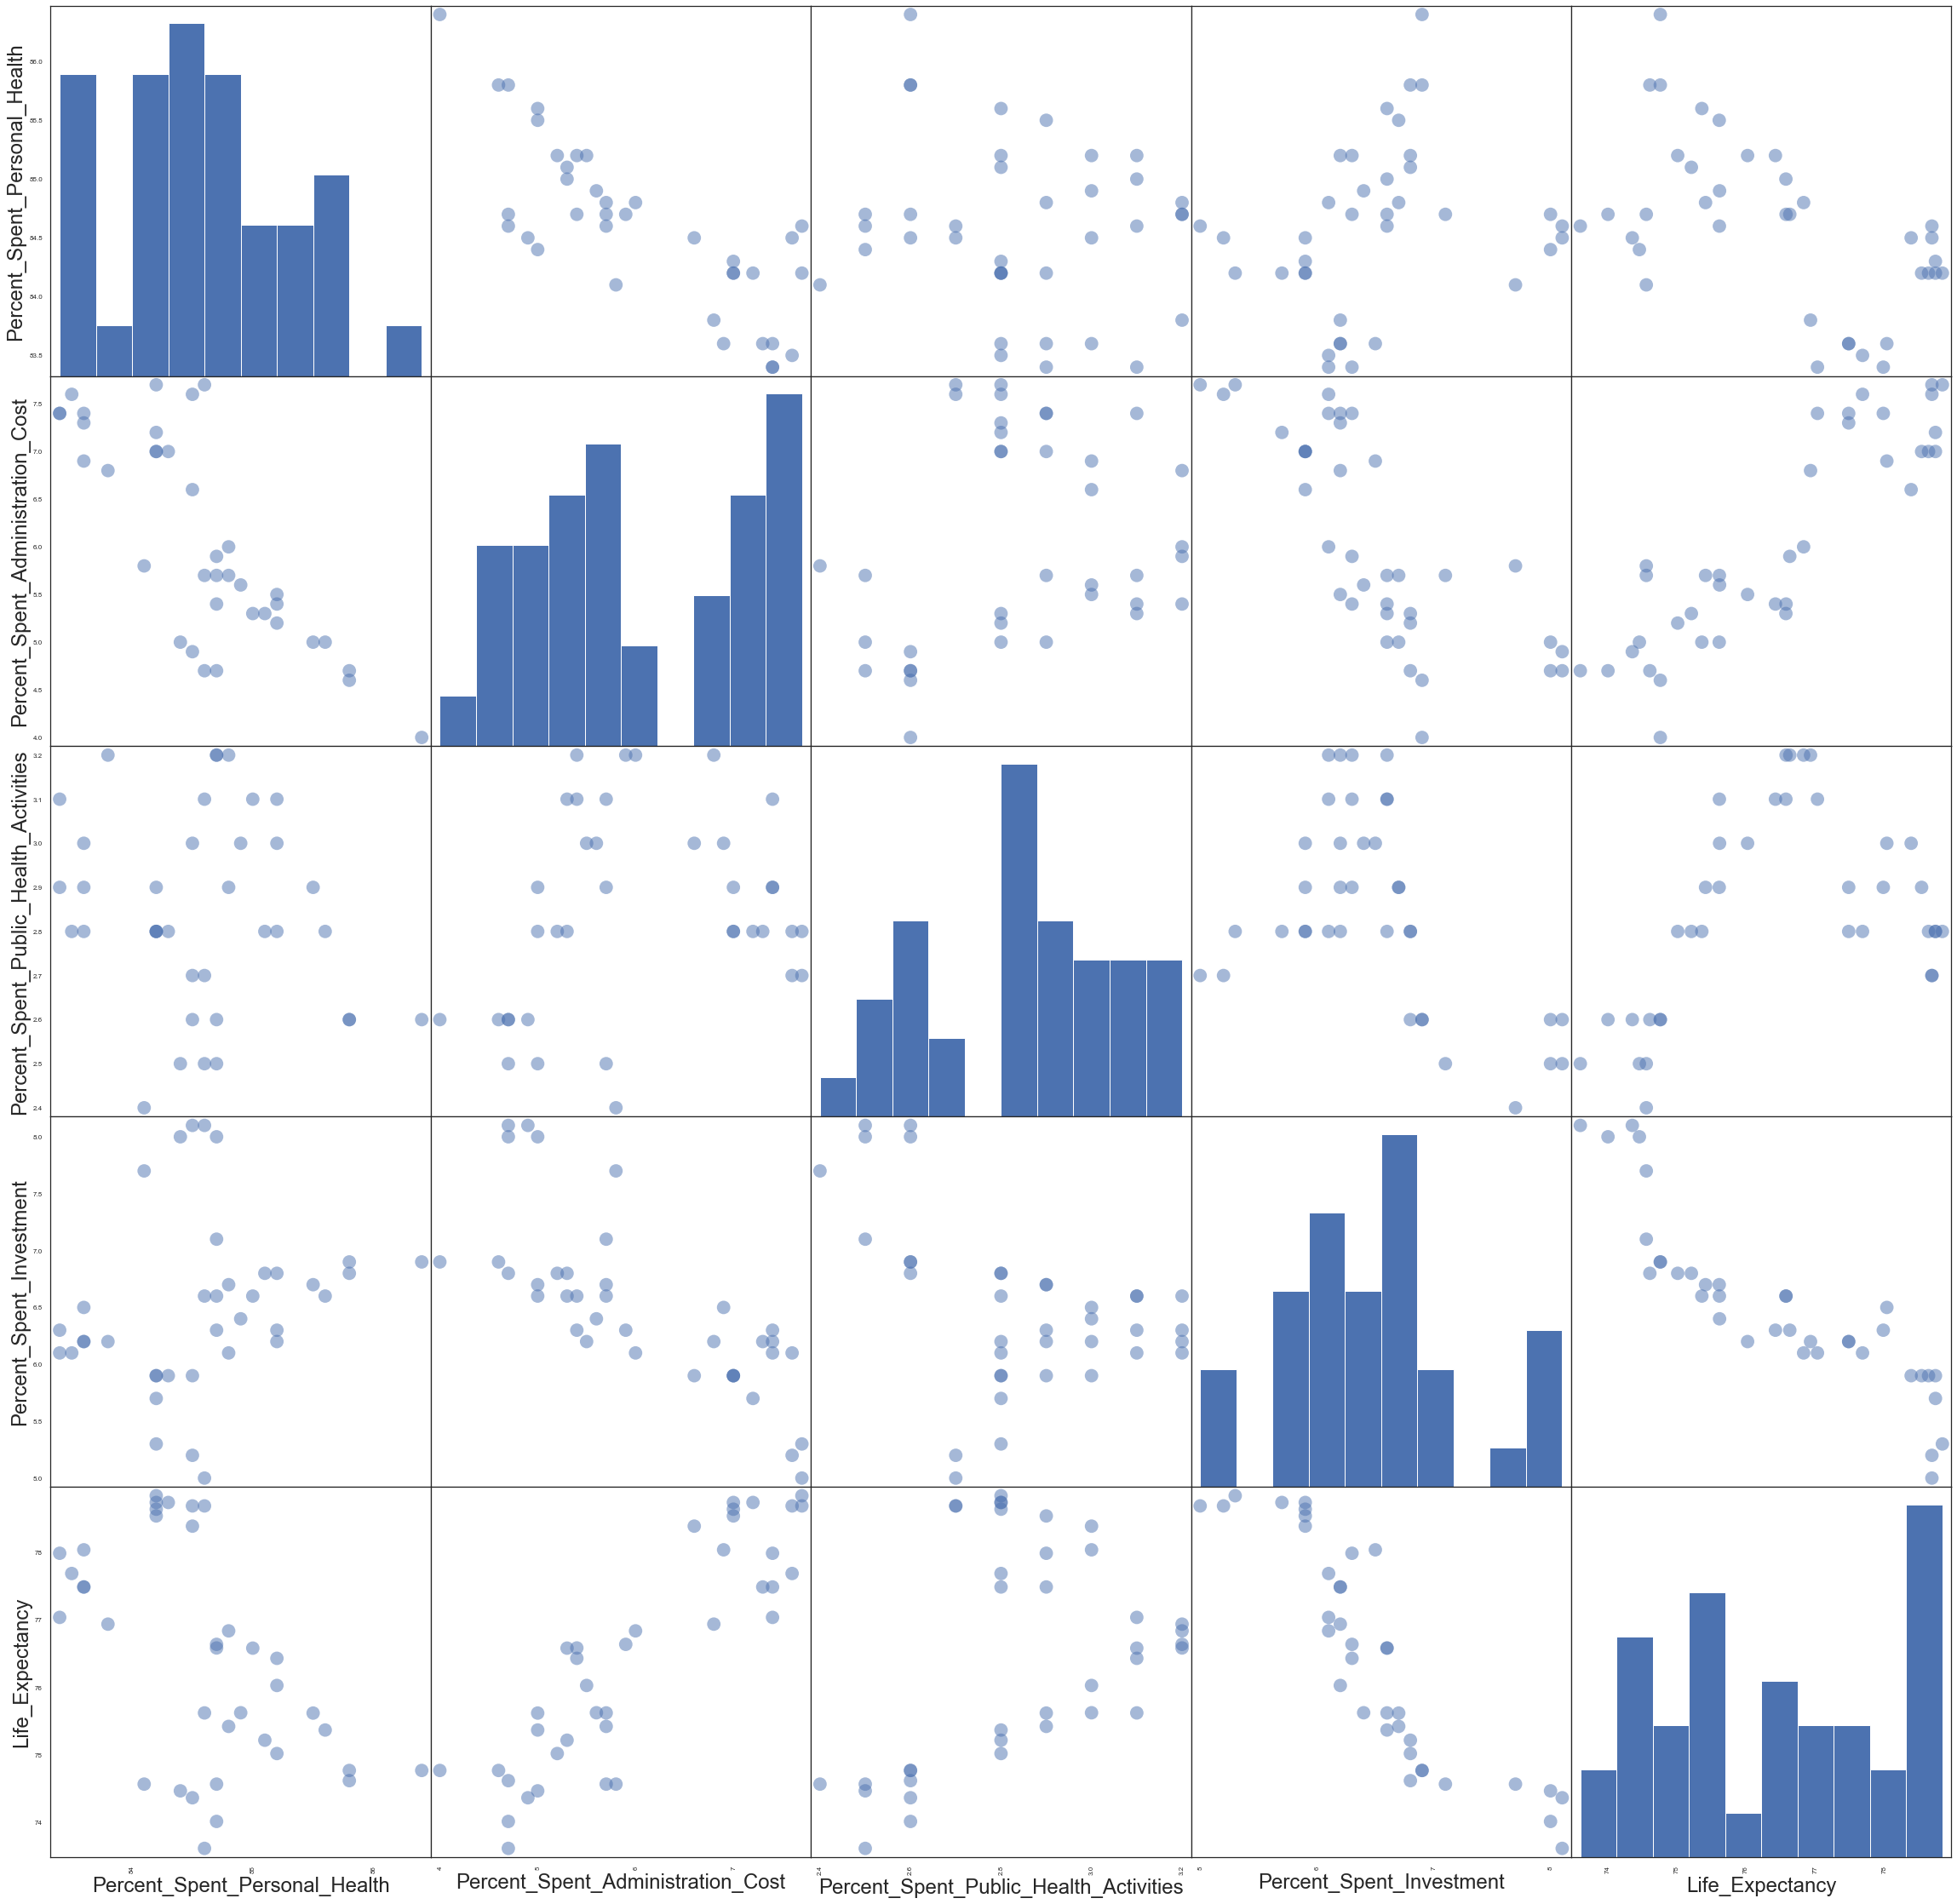

In [68]:
pd.plotting.scatter_matrix(datum[['Percent_Spent_Personal_Health', 'Percent_Spent_Administration_Cost', 'Percent_Spent_Public_Health_Activities', 
                               'Percent_Spent_Investment', 'Life_Expectancy']], figsize=(40,40), s=1000);

As percent spent on personal health increased, percent spent on administration costs went down while spending on public health activites and investment remained steady. As percent spent on administration costs increased, percent spent on personal health and investment went down while percent spent on public health activities remained steady. As percent spent on public activities increased, spending on other categories remained steady. As percent spent on investment increased, percent spent on administration costs decreased while other categories remained steady

### Predictive Model

To investigate our initial hypothesis, we take on a predictive task: 'Can we predict life expectancy (in years) using the U.S economic & health indicators in our dataset?'. This section explores this idea to quantify the hypothesized impact of these variables on life expectancy. Since we want to predict a quantitative variable from other quantitative predictors, we will use Linear Regression to create all models. The assumptions of the linear regression are the following:
- Linear Relationship.
- No multicollinearlity.
- No autocorrelation.
- Homeskedacity.

#### Baseline
For this baseline, we will use a *single* predictive variable - Annual Percentage Change on Healthcare Spending. This baseline follows a simple hypothesis - as national health expenditure increases (positive annual % change), life expectancy increases as well. 

To insure that our predictive variable follows a normal distribution, we will normalize annual % changes in health expenditure using a log transformation.

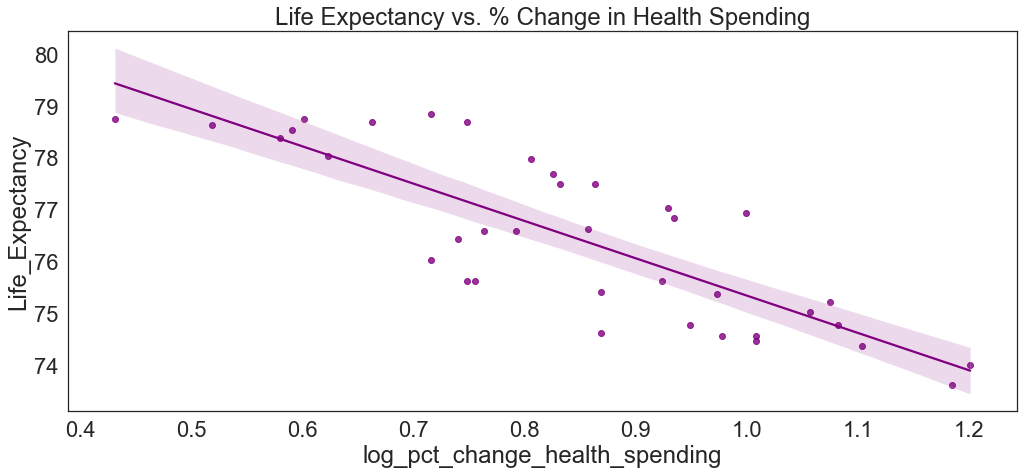

In [69]:
# create df only containing single predictor and outcome variable.
df_baseline = datum[['Life_Expectancy']].copy()
df_baseline['log_pct_change_health_spending'] = np.log10(datum['Annual_Pct_Change_Health_Spending'])

# plot regression...
fig = sns.regplot(x='log_pct_change_health_spending', y='Life_Expectancy', data=df_baseline, color='purple')
fig.set_title('Life Expectancy vs. % Change in Health Spending');

In [70]:
# fitting model to single predictor - log % change in health spending.
outcome, predictors = patsy.dmatrices('Life_Expectancy ~ log_pct_change_health_spending', df_baseline)
model = sm.OLS(outcome, predictors)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     74.11
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           3.66e-10
Time:                        22:05:15   Log-Likelihood:                -48.937
No. Observations:                  37   AIC:                             101.9
Df Residuals:                      35   BIC:                             105.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In the model, we can see that the approximate effect of 1 unit change of Annual Percentage Change is (-7.2021/100) or -0.072021 - as annual % change in health spending increases, life expectancy **decreases** by 0.072021 years. This makes more sense from what we have seen in our EDA: periods with large % changes in health expenditure represent time periods of drastic healthcare policy changes while periods of low % changes represent periods that have already had these changes. We saw this effect of slowed growth when looking at the time trend of this variable in the EDA.

- How do the residuals look like for the baseline? Can we narrow the residual range in future models?

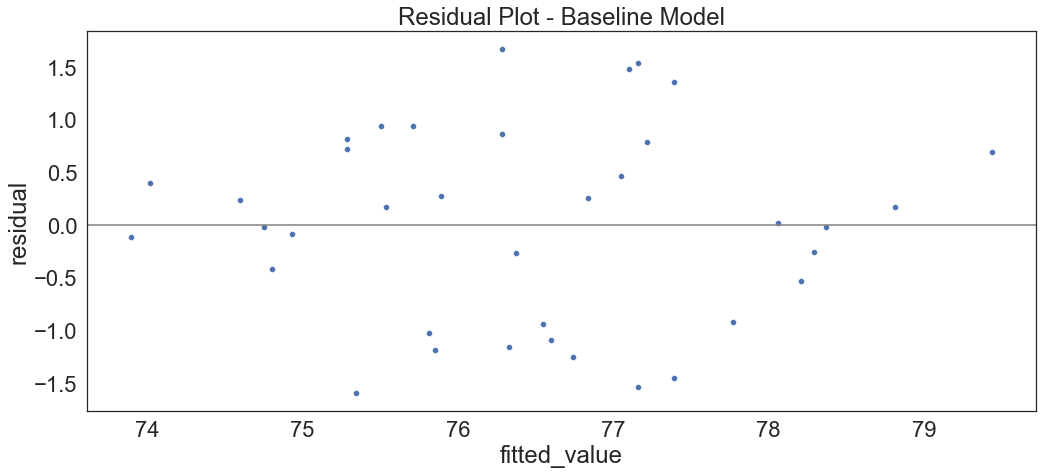

In [71]:
res = pd.DataFrame(columns=['residual', 'fitted_value'])
res['residual'] = results.fittedvalues - datum['Life_Expectancy']
res['fitted_value'] = results.fittedvalues

fig = sns.scatterplot(x='fitted_value', y='residual', data=res)
fig.axhline(0, color='gray', linestyle='-')
fig.set_title('Residual Plot - Baseline Model');

- What is the in-sample RMSE of this baseline?

In [72]:
from sklearn.metrics import mean_squared_error # metric for performance

In [73]:
b0, b1 = results.params # finding intercept and predictors

In [74]:
b0, b1

(82.54657485099442, -7.202058483160831)

In [75]:
def lifetime_baseline(health_percent):        # Applying Linear Regression Formula
    return b0 + b1*np.log10(health_percent)

In [76]:
datum['Baseline_Life_Expectancy'] = datum['Annual_Pct_Change_Health_Spending'].apply(lifetime_baseline)

In [77]:
datum.head()

,Year,Health_Spending,Health_Consumption_Spending,Personal_Health,Administration_Cost,Public_Health_Activities,Investment,Population,GDP,Annual_Pct_Change_Health_Spending,...,Per_Capita_Public_Health_Activities,Per_Capita_Investment,Pct_GDP_on_National_Health,Life_Expectancy,Youth_Mortality_Rate,Annual_Deaths,Vaccination_Rate,Per_Capita_Real_GDP,Pct_Uninsured_Rate,Baseline_Life_Expectancy
0,1980.0,2.532000e+11,2.327000e+11,2.143000e+11,1.190000e+10,6.400000e+09,2.060000e+10,230400000.0,2.857300e+12,15.3,...,28.0,89.0,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,11.4,74.014358
1,1981.0,2.936000e+11,2.701000e+11,2.486000e+11,1.390000e+10,7.500000e+09,2.350000e+10,232700000.0,3.207000e+12,15.9,...,32.0,101.0,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,NaN,73.894043
2,1982.0,3.309000e+11,3.042000e+11,2.795000e+11,1.610000e+10,8.600000e+09,2.670000e+10,235000000.0,3.343800e+12,12.7,...,37.0,114.0,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,12.5,74.596916
3,1983.0,3.648000e+11,3.355000e+11,3.080000e+11,1.830000e+10,9.300000e+09,2.930000e+10,237200000.0,3.634000e+12,10.2,...,39.0,123.0,10.0,74.463415,1.606382,2087053.0,97.0,29674.672,13.1,75.282577
4,1984.0,4.019000e+11,3.710000e+11,3.379000e+11,2.330000e+10,9.800000e+09,3.090000e+10,239400000.0,4.037600e+12,10.2,...,41.0,129.0,10.0,74.563415,1.566490,2113891.0,97.0,31669.826,12.9,75.282577


In [78]:
rmse_baseline = np.sqrt(mean_squared_error(datum['Life_Expectancy'], datum['Baseline_Life_Expectancy'])) # Measuring Performance
rmse_baseline

0.9081700481987319

#### Model 1

- *How do health indicators reflect changes in life expectancy?*

In order to improve upon the initial baseline model we will add an additional health indicator variable: youth mortality rate. From our EDA, we have seen that youth mortality rate has *decreased* throughout the years, while life expectancy has steadily increased. We can begin by visualizing the linear regression of life_expectancy ~ youth_mortality to confirm these results.

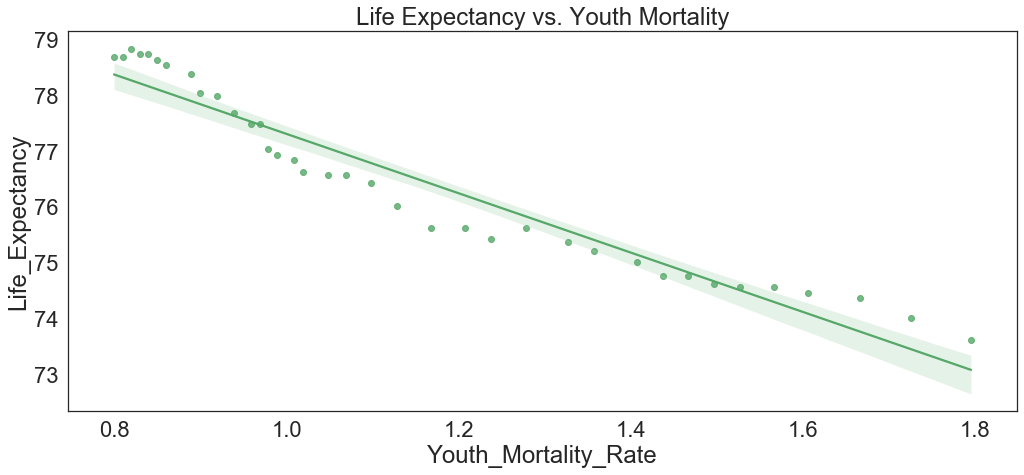

In [79]:
#plot regression between Youth Mortality Rate and Log % Change in Health Spending
fig = sns.regplot(x='Youth_Mortality_Rate', y='Life_Expectancy', data=datum, color='g')
fig.set_title('Life Expectancy vs. Youth Mortality');

For this model, we will add this *second* variable of youth mortality rates to the log % annual change in national spending to observe if our results improve.

In [80]:
# add Youth Mortality to baseline dataframe
df_baseline['Youth_Mortality_Rate'] = datum['Youth_Mortality_Rate']
df_baseline.head()
          
# fitting model to two predictors - log % change in health spending and youth mortality rate
outcome, predictors = patsy.dmatrices('Life_Expectancy ~ log_pct_change_health_spending + Youth_Mortality_Rate', df_baseline)
model = sm.OLS(outcome, predictors)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     249.7
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           4.72e-21
Time:                        22:05:16   Log-Likelihood:                -19.040
No. Observations:                  37   AIC:                             44.08
Df Residuals:                      34   BIC:                             48.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

We can see here that our R-Squared went up from 0.679 to 0.936, which means that we are capturing a greater proportion of the effect in our analysis. The adjusted R-squared (to compare between our baseline including a single regressor & this model) has *also* gone up to 0.933. Our p-value being < 0.01 shows that the effect of youth mortality rate is significant. However, our p-value for percent change in health spending is now > 0.01, which suggest that it is *insignificant* as opposed to our baseline. 

- How do the residuals look like now?

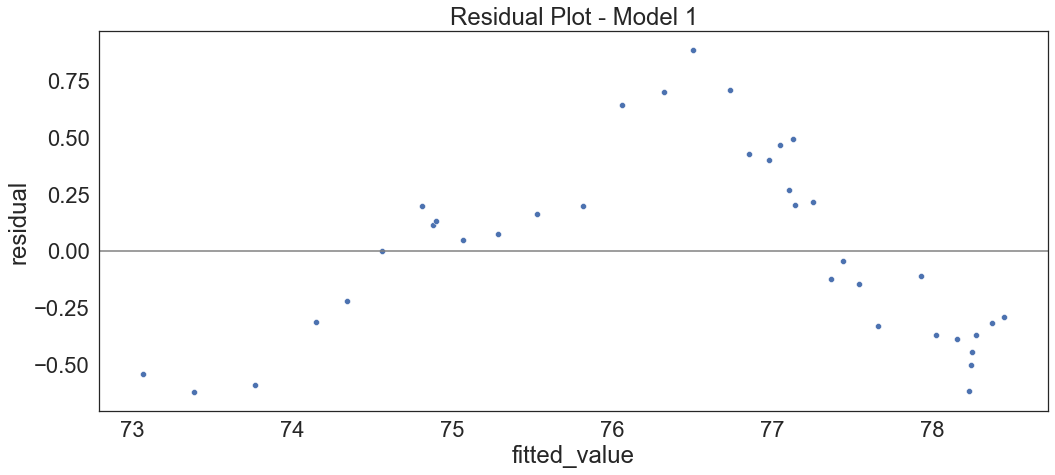

In [81]:
res = pd.DataFrame(columns=['residual', 'fitted_value'])
res['residual'] = results.fittedvalues - datum['Life_Expectancy']
res['fitted_value'] = results.fittedvalues

fig = sns.scatterplot(x='fitted_value', y='residual', data=res)
fig.axhline(0, color='gray', linestyle='-')
fig.set_title('Residual Plot - Model 1');

From this plot, the residuals form a *pattern*, which hints at the fact that this model may be faulty. Despite high R-squared and adjusted R-squared values, the model may be overfitting or there may be multicollinearity among the two predictors.

- Why is there an inverted U shaped pattern in the residual plot?

The inverted U shape pattern in the residual plot means that there is a non-random pattern in our residuals, which means youth mortality rate might not be a good fit for a linear model. We can check for multicollinearity between log annual % change and youth mortality rate. Is there an add pattern between predictors?

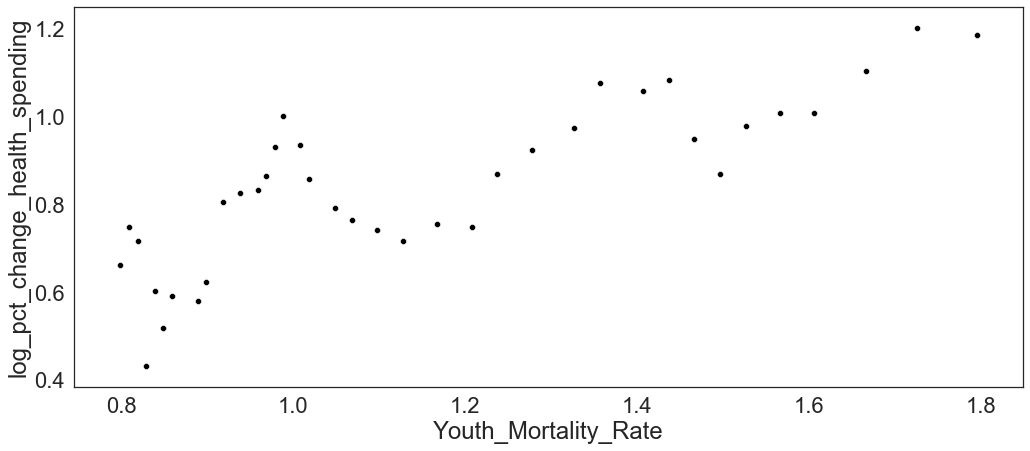

In [82]:
sns.scatterplot(x='Youth_Mortality_Rate', y='log_pct_change_health_spending', data=df_baseline, color='black')



*   What is the in-sample RMSE?



In [83]:
b0, b1, b2 = results.params  

In [84]:
b0, b1, b2 # finding intercept and predictors

(82.86146514846574, -0.9515420972857894, -4.826011907181092)

In [85]:
def lifetime_model_one(col1, col2): # Applying Linear Regression Formula
    return b0 + b1*np.log10(col1)+b2*(col2)

In [86]:
datum['Model_One_Life_Expectancy'] = lifetime_model_one(datum['Annual_Pct_Change_Health_Spending'], datum['Youth_Mortality_Rate'])

In [87]:
datum.head()

,Year,Health_Spending,Health_Consumption_Spending,Personal_Health,Administration_Cost,Public_Health_Activities,Investment,Population,GDP,Annual_Pct_Change_Health_Spending,...,Per_Capita_Investment,Pct_GDP_on_National_Health,Life_Expectancy,Youth_Mortality_Rate,Annual_Deaths,Vaccination_Rate,Per_Capita_Real_GDP,Pct_Uninsured_Rate,Baseline_Life_Expectancy,Model_One_Life_Expectancy
0,1980.0,2.532000e+11,2.327000e+11,2.143000e+11,1.190000e+10,6.400000e+09,2.060000e+10,230400000.0,2.857300e+12,15.3,...,89.0,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,11.4,74.014358,73.069077
1,1981.0,2.936000e+11,2.701000e+11,2.486000e+11,1.390000e+10,7.500000e+09,2.350000e+10,232700000.0,3.207000e+12,15.9,...,101.0,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,NaN,73.894043,73.389438
2,1982.0,3.309000e+11,3.042000e+11,2.795000e+11,1.610000e+10,8.600000e+09,2.670000e+10,235000000.0,3.343800e+12,12.7,...,114.0,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,12.5,74.596916,73.770492
3,1983.0,3.648000e+11,3.355000e+11,3.080000e+11,1.830000e+10,9.300000e+09,2.930000e+10,237200000.0,3.634000e+12,10.2,...,123.0,10.0,74.463415,1.606382,2087053.0,97.0,29674.672,13.1,75.282577,74.149321
4,1984.0,4.019000e+11,3.710000e+11,3.379000e+11,2.330000e+10,9.800000e+09,3.090000e+10,239400000.0,4.037600e+12,10.2,...,129.0,10.0,74.563415,1.566490,2113891.0,97.0,31669.826,12.9,75.282577,74.341840


In [88]:
rmse_model_one = np.sqrt(mean_squared_error(datum['Life_Expectancy'], datum['Model_One_Life_Expectancy'])) # Measuring Performance
rmse_model_one

0.4048061639808873

Our low MSE value for model 1 also confirms our point that youth mortality rate is an unfit variable for a linear model analysis.

#### Model 2

- *Can the decomposition of annual % changes of total spending into its subcategories better capture the small fuctuations in life expectancy?*

We will now break up the aforementioned variable of Annual % change in health spending from our baseline model into its various factors. This will allow us a closer look into which aspects of health spending contribute the most to a higher life expectancy. We will analyze annual % change in personal health, annual % change in public health activities, annual % change in administration cost. We have left out investment to avoid multicolinnearity.

In [89]:
# Creating a second model - includes 3 out 4 components of total annual national health spending to avoid multicollinearity
df_mod2 = datum[['Annual_Pct_Change_Personal_Health', 'Annual_Pct_Change_Public_Health_Activities',
                 'Annual_Pct_Change_Administration_Cost', 'Life_Expectancy']].copy()

In [90]:
# fitting model to two predictors - log % change in health spending % change in investment
outcome, predictors = patsy.dmatrices('Life_Expectancy ~ Annual_Pct_Change_Personal_Health + Annual_Pct_Change_Public_Health_Activities + Annual_Pct_Change_Administration_Cost', df_mod2)
model = sm.OLS(outcome, predictors)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     28.65
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           2.61e-09
Time:                        22:05:16   Log-Likelihood:                -46.252
No. Observations:                  37   AIC:                             100.5
Df Residuals:                      33   BIC:                             106.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

We can see now that our Adjusted R-Squared value has improved to 0.697. Our analysis shows that an increase in personal health expenses and spending on public health activities leads to a statistically significant (with an alpha of 0.05) reduction in life expectancy by 2.8% and 1.14% respectively. Our adjusted r-squared is slightly lower than our r-squared value, however, which is explained by the fact that Annual % change in administration cost is statistically insignificant. This means that the statistically insignificant extra predictor variable of "% Change in Administration Cost" did not improve the existing model.

How does the residual look like now?

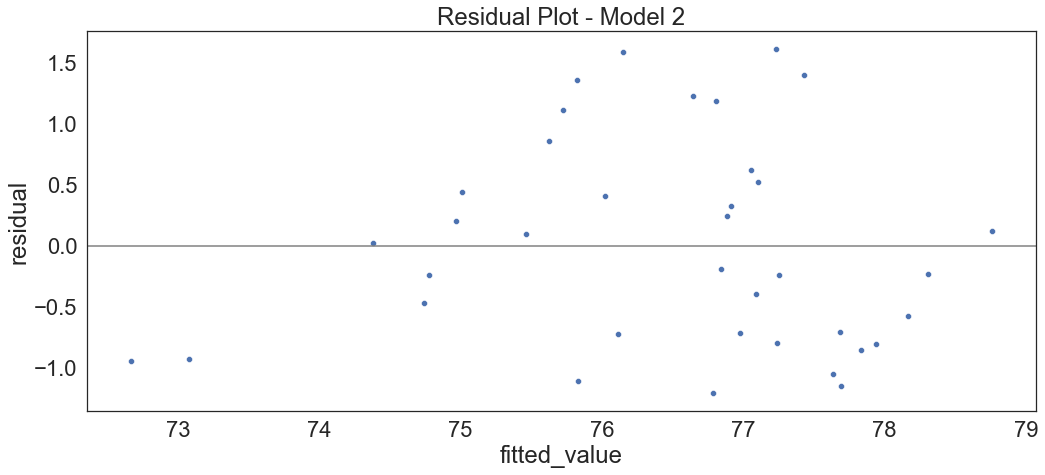

In [91]:
res = pd.DataFrame(columns=['residual', 'fitted_value'])
res['residual'] = results.fittedvalues - datum['Life_Expectancy']
res['fitted_value'] = results.fittedvalues

fig = sns.scatterplot(x='fitted_value', y='residual', data=res)
fig.axhline(0, color='gray', linestyle='-')
fig.set_title('Residual Plot - Model 2');

Our residual plot shows a random plot, which means that these variables are appropriate for a linear model analysis.

* What is the in-sample RMSE?



In [92]:
b0, b1, b2, b3 = results.params

In [93]:
b0, b1, b2, b3 # finding intercept and predictors

(79.52018391197387,
 -0.28822108354012727,
 -0.114068733638583,
 0.005765522955012731)

In [94]:
def lifetime_model_two(col1, col2, col3): # Applying Linear Regression Formula
    return b0 + b1*(col1)+b2*(col2)+b3*(col3)

In [95]:
datum['Model_Two_Life_Expectancy'] = lifetime_model_two(datum['Annual_Pct_Change_Personal_Health'], datum['Annual_Pct_Change_Public_Health_Activities'], 
                                                        datum['Annual_Pct_Change_Administration_Cost'])

In [96]:
datum.head()

,Year,Health_Spending,Health_Consumption_Spending,Personal_Health,Administration_Cost,Public_Health_Activities,Investment,Population,GDP,Annual_Pct_Change_Health_Spending,...,Pct_GDP_on_National_Health,Life_Expectancy,Youth_Mortality_Rate,Annual_Deaths,Vaccination_Rate,Per_Capita_Real_GDP,Pct_Uninsured_Rate,Baseline_Life_Expectancy,Model_One_Life_Expectancy,Model_Two_Life_Expectancy
0,1980.0,2.532000e+11,2.327000e+11,2.143000e+11,1.190000e+10,6.400000e+09,2.060000e+10,230400000.0,2.857300e+12,15.3,...,8.9,73.609756,1.795500,2017882.0,96.0,29154.891,11.4,74.014358,73.069077,72.667501
1,1981.0,2.936000e+11,2.701000e+11,2.486000e+11,1.390000e+10,7.500000e+09,2.350000e+10,232700000.0,3.207000e+12,15.9,...,9.2,74.009756,1.725824,2037675.0,96.0,29631.477,NaN,73.894043,73.389438,73.078322
2,1982.0,3.309000e+11,3.042000e+11,2.795000e+11,1.610000e+10,8.600000e+09,2.670000e+10,235000000.0,3.343800e+12,12.7,...,9.9,74.360976,1.666108,2061284.0,96.0,28651.811,12.5,74.596916,73.770492,74.383341
3,1983.0,3.648000e+11,3.355000e+11,3.080000e+11,1.830000e+10,9.300000e+09,2.930000e+10,237200000.0,3.634000e+12,10.2,...,10.0,74.463415,1.606382,2087053.0,97.0,29674.672,13.1,75.282577,74.149321,75.824309
4,1984.0,4.019000e+11,3.710000e+11,3.379000e+11,2.330000e+10,9.800000e+09,3.090000e+10,239400000.0,4.037600e+12,10.2,...,10.0,74.563415,1.566490,2113891.0,97.0,31669.826,12.9,75.282577,74.341840,76.151798


In [97]:
rmse_model_two = np.sqrt(mean_squared_error(datum['Life_Expectancy'], datum['Model_Two_Life_Expectancy'])) # Measuring Performance
rmse_model_two

0.8445989130132089

#### Evaluating Models by Performance - RMSE

In [98]:
rmses = {"Baseline": rmse_baseline, "Model1": rmse_model_one, "Model2": rmse_model_two}
rmses

{'Baseline': 0.9081700481987319,
 'Model1': 0.4048061639808873,
 'Model2': 0.8445989130132089}

When evaluating purely by performance, Model 1 with annual percent health spending and youth mortality rate had the lowest root mean squared error between expected and actual life expectancy. The issue that arose with Model 1 was that the residuals were not randomly distributed around zero which means it is not a good fit for a linear model and therefore Model 2 was the best performing model with annual % change in personal health, annual % change in public health activities and annual % change in administration cost as predictors

#### Final Model

- **Best Performing Model: Model 2**



We can plot this final model in a 1D plot by plotting the actual and predicted life expectancy value along a single axis (annual % change in personal healthcare.) Through this visualization, we can observe if  our model is able to capture more of the the smaller fluctuations in life expectancy.

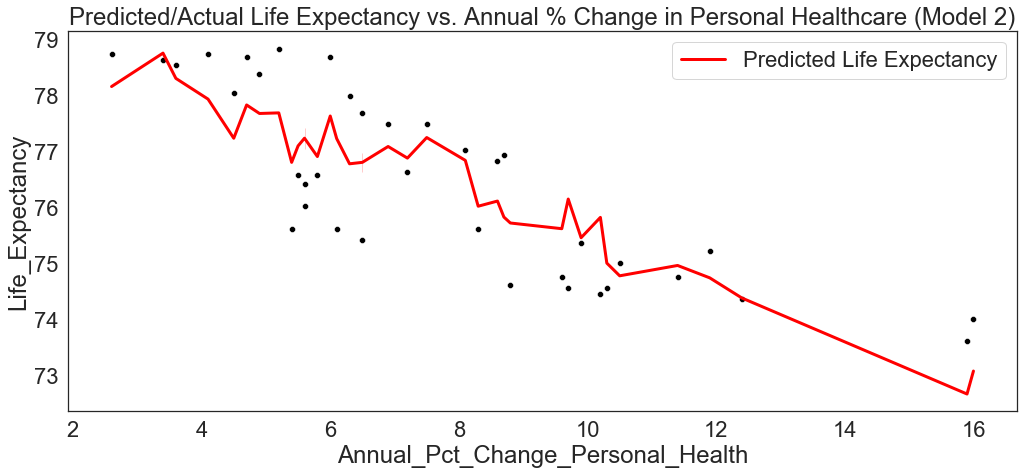

In [99]:
res['Annual_Pct_Change_Personal_Health'] = df_mod2['Annual_Pct_Change_Personal_Health']

fig = sns.scatterplot(x='Annual_Pct_Change_Personal_Health', y='Life_Expectancy', data=df_mod2, color='black')
sns.lineplot(x='Annual_Pct_Change_Personal_Health', y='fitted_value', data=res, legend=True,
               linewidth=3, color='red', label='Predicted Life Expectancy')

fig.set_title('Predicted/Actual Life Expectancy vs. Annual % Change in Personal Healthcare (Model 2)');

## Results 
When we moved to the predictive task, we decided to use linear regression with single or multiple variables to predict life expectancy and we wanted to explore which predictors were better at predicting life expectancy in the U.S. We tried variables like annual percent change in health spending or public activities spending and we saw that our best predictors in terms of both performance with root mean squared error and lack of overfitting was predicting life expectancy with annual percent change in spending in personal health, public health activities, and administration costs. 

Our baseline was run with linear regression with log annual percent change in health spending and we saw a root mean square error of 0.9 and we wanted to see if there were other models with different predictors and higher performance

For our first model, we used annual percent change in health spending and youth mortality. For annual percent change in health spending, we had to log transform the data to see a linear relationship with it and life expectancy so that applying linear regression would make sense. When we used youth mortality rate as a predictor with health spending, we saw that it resulted in a significantly lower root mean squared error. However, when we looked at the residual plot we saw that it was not randomly distributed around zero and there would be concern about overfitting. 

For our second model, we used annual percent change with personal health, public health activities, and adminsitration costs. We saw a lower root mean squared error than the baseline without the overfitting seen in the model with youth mortality rate as a predictor. Therefore we determined that the best predictor for life expectancy in the U.S. among the models we ran was the predictors of annual percent change with personal health, public health activities, and adminsitration costs.

# Ethics & Privacy

There were no privacy terms/issues in collecting our data: we gathered our data on national health spending from  Centers for Medicare & Medicaid Servives (CMS) and our heath indicators from World Bank.org - all public or goverment websites. There is no personally identifiable information in either of these datasets as the data is composed of aggregate yearly statistics - none of these values can be traced back to any singular individuals and it *only* describe a yearly collected value computed from an entire population.

Before beginninng our analysis, one of our major focuses were to see if elements in our dataset were given equal weight in our analysis, which could lead to more skewed outcomes. Therefore, we did *not* delete or exclude data as all of our variables add valuable information on life expectancy & reflect different time trends. Addionally, we wanted to make sure that measurements in the data were not 'faulty' if we are relying on them for analysis - this is why we converted specific variables to their given units in the original dataset (to billions, etc) in our data cleaning. To deal with bias in our analysis, we made sure to state any previous hypothesis/thoughts we had before analyzing at the a given variable (as seen in the EDA.) This was to discuss & *compare* our previous notions to trends to the *actual* trend - any conclusion we drew was based from the trend seen in the data. 

To conclude, our analysis is designed to include all given variables and explore and hypothesize on the trends we can observe from these values. 

# Conclusion & Discussion

In our project, we wanted to explore how healthcare quality would affect life expectancy here in the United States. We were able to find datasets from public and government websites that contained data about health care spending, annual percent change/per capita health expenditures and as well as additional factors like GDP and vaccination rates which we hoped to use as elements in our prediction problem. We were able to clean the data and join the features of the different datasets by arranging them yearly from 1980 to 2016. Doing this allowed us to have a more organized dataset and also got rid of redundant data and gave us variables that we could hopefully use in our analysis. Additionally, to better understand the distributions in our dataset, we performed exploratory data analysis and allowed us to look at relationships between our variables.

Through our predictive task, we were able to see how both economic indicator variables (annual health expenditures) and health indicating variables (vaccination rates, youth mortality rates, and annual percent change in Public Health Activities) significantly impacted life expectancy throughout the years in the United States. By noticing how health expenditures correlated well with specific health indicator variables (percent change in Public Health Activities), our anaylsis showed which variable was more useful in informing decisions made when it comes to health spending. Lastly, through the predictive model, we were also able to look at other health variables that showed possible indicators of having an impact on life expectancy with health expenditures in the United States.

Limitations we faced and avenues we failed to explore in this project include the healthcare disparities among different genders, races, and ages seeing as those aspects all contribute to the quality of healthcare received in the U.S. Additionally, we chose variables we felt best encapsulated healthcare standards, but there are many ways to measure quality of healthcare and these variables in our project represent only a small portion of them. However, this project did well to shed light on the ways that healthcare in the U.S. can be improved overall through financial and economic pursits. Based off of our findings, it would seem beneficial for improved government investment in public health spending, which sits in opposition to many of the popular attitudes regarding personal health and wellbeing that center individual lifestyles and choices. 

# Team Contributions

- Background & Prior Work - Frida, Tatsuya
- Data Search - Frida, Sarat
- Data Cleaning - Frida, Sarat, Gabby
- EDA
  - Data Analysis (Time Trends on Expenditure Decompositions/Health Indicators) - Frida
  - Relationships Between Variables - Sarat
  - Missing Values - Tatsuya, Murad, Frida
- Baseline Model - Frida
- Models - Gabby, Murad, Tatsuya
- Model Evaluation - Sarat
- Results - Sarat
- Ethics & Privacy - Frida
- Conlusion & Discussion - Tatsuya, Sarat, Gabby